# Problem Statement:
## Creating clusters on global development measurement dataset

In [1]:
# Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel(r"C:\Users\abhil\Downloads\Clustering_deployment\World_development_mesurement.xlsx")

In [3]:
# Checking Shape of Df
df.shape

(2704, 25)

In [4]:
# Checking for duplicates
df.duplicated().sum()

0

In [5]:
#Checking top 5 rows
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [6]:
#Checking for last 10 rows
df.tail(10)

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
2694,0.016,34.6%,NaN,St. Lucia,15.0,59.0,NaN,"$1,318,148,148",0.085,$556,...,72.0,1.2,1,0.243,0.670,0.087,180870,0.185,"$335,000,000","$49,000,000"
2695,0.016,NaN,NaN,St. Martin (French part),NaN,NaN,NaN,NaN,NaN,NaN,...,76.0,NaN,1,NaN,NaN,NaN,30959,NaN,NaN,NaN
2696,0.017,38.7%,NaN,St. Vincent and the Grenadines,10.0,75.0,NaN,"$694,444,444",0.052,$340,...,70.0,1.2,1,0.257,0.675,0.068,109373,0.495,"$93,000,000","$14,000,000"
2697,0.018,27.9%,NaN,Suriname,694.0,165.0,NaN,"$5,012,121,212",0.059,$521,...,68.0,1.1,1,0.278,0.656,0.066,534541,0.662,"$79,000,000","$58,000,000"
2698,0.015,29.1%,NaN,Trinidad and Tobago,41.0,63.0,NaN,"$23,436,342,520",0.054,$972,...,66.0,1.4,1,0.207,0.705,0.088,1337439,0.088,NaN,NaN
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,"$904,000,000","$3,202,000,000"
2703,0.011,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,...,76.0,NaN,1,0.206,0.641,0.152,105275,0.949,NaN,NaN


In [7]:
#Checking Datatypes
df.dtypes

Birth Rate                float64
Business Tax Rate          object
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                        object
Health Exp % GDP          float64
Health Exp/Capita          object
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records           int64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound            object
Tourism Outbound           object
dtype: object

In [8]:
#Removing unwanted Characters.
df['GDP'] = df['GDP'].str.replace('$','')
df['Health Exp/Capita'] = df['Health Exp/Capita'].str.replace('$','')
df['Tourism Inbound'] = df['Tourism Inbound'].str.replace('$','')
df['Tourism Outbound'] = df['Tourism Outbound'].str.replace('$','')
df['Business Tax Rate'] = df['Business Tax Rate'].str.replace('%','')
df['GDP'] = df['GDP'].str.replace(',','')
df['Health Exp/Capita'] = df['Health Exp/Capita'].str.replace(',','')
df['Tourism Inbound'] = df['Tourism Inbound'].str.replace(',','')
df['Tourism Outbound'] = df['Tourism Outbound'].str.replace(',','')

In [9]:
df

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,54790058957,0.035,60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,102000000,193000000
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,9129594819,0.034,22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,34000000,146000000
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,2359122303,0.043,15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,77000000,50000000
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,5788311645,0.047,152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,227000000,209000000
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,2610959139,0.051,12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,23000000,30000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4,NaN,United States,5.0,4.0,2132446.0,16244600000000,0.179,8895,...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,200092000000,126573000000
2701,0.015,41.9,NaN,Uruguay,7.0,85.0,NaN,50004354667,0.089,1308,...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,2222000000,1028000000
2702,0.020,61.9,NaN,"Venezuela, RB",144.0,180.0,NaN,381286223859,0.046,593,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,904000000,3202000000


In [10]:
#Checking for unique countries.
df.Country.nunique()

208

In [11]:
#Changing the dtypes.
df['GDP'] = df['GDP'].astype('float64')
df['Tourism Outbound'] = df['Tourism Outbound'].astype('float64')
df['Health Exp/Capita']= df['Health Exp/Capita'].astype('float64')
df['Tourism Inbound'] = df['Tourism Inbound'].astype('float64')
df['Business Tax Rate'] = df['Business Tax Rate'].astype('float64')

In [12]:
df.dtypes

Birth Rate                float64
Business Tax Rate         float64
CO2 Emissions             float64
Country                    object
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records           int64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total            int64
Population Urban          float64
Tourism Inbound           float64
Tourism Outbound          float64
dtype: object

In [13]:
#Checking for null values
df.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

In [14]:
# Checking percentage of Missing Values
df.isnull().mean().sort_values(ascending=True)*100

Population Total           0.000000
Country                    0.000000
Number of Records          0.000000
Population Urban           0.961538
Birth Rate                 4.400888
Life Expectancy Male       5.029586
Life Expectancy Female     5.029586
Mobile Phone Usage         6.176036
Internet Usage             6.397929
GDP                        7.766272
Population 0-14            8.136095
Population 15-64           8.136095
Population 65+             8.136095
Infant Mortality Rate      9.615385
Health Exp/Capita         11.427515
Health Exp % GDP          11.427515
Tourism Inbound           13.609467
Tourism Outbound          17.418639
CO2 Emissions             21.412722
Lending Interest          30.473373
Energy Usage              33.986686
Days to Start Business    36.464497
Business Tax Rate         47.374260
Hours to do Tax           47.633136
Ease of Business          93.158284
dtype: float64

In [15]:
#Creating a new dataframe.
df_merged = df.groupby("Country").mean()

In [16]:
df_merged

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.043154,36.3000,2375.727273,8.111111,170.0,NaN,9.718945e+09,0.091909,30.636364,275.0,...,56.384615,0.254545,1.0,0.490308,0.488769,0.020769,2.539926e+07,0.232923,1.060000e+08,8.240000e+07
Albania,0.014692,42.5500,3902.090909,23.000000,82.0,2024.583333,8.895522e+09,0.061462,168.846154,364.5,...,73.000000,0.561538,1.0,0.258385,0.653692,0.087923,2.956845e+06,0.478538,1.165231e+09,1.007077e+09
Algeria,0.022077,73.7125,102837.636364,25.000000,151.0,34042.166667,1.190391e+11,0.038462,133.846154,451.0,...,68.384615,0.492308,1.0,0.292692,0.663077,0.044231,3.476067e+07,0.645154,2.752308e+08,4.513077e+08
American Samoa,0.020500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,1.0,NaN,NaN,NaN,5.752538e+04,0.880000,NaN,NaN
Andorra,0.010583,NaN,537.636364,NaN,NaN,NaN,2.268380e+09,0.063231,2394.461538,NaN,...,NaN,0.700000,1.0,NaN,NaN,NaN,7.668408e+04,0.897462,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0.016769,38.3375,98764.272727,43.200000,98.0,43263.750000,7.791354e+10,0.060769,51.692308,1000.5,...,70.076923,0.546154,1.0,0.266154,0.668538,0.065385,8.325515e+07,0.279462,3.597000e+09,1.325750e+09
Virgin Islands (U.S.),0.013000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.538462,0.483333,1.0,0.224769,0.661000,0.114308,1.073368e+05,0.938308,1.259091e+09,NaN
"Yemen, Rep.",0.034923,62.4750,19319.090909,41.300000,129.0,6517.833333,2.065261e+10,0.048308,49.000000,248.0,...,60.384615,0.215385,1.0,0.448077,0.524769,0.027231,2.066415e+07,0.295154,4.613077e+08,2.036667e+08


In [17]:
df_merged.dtypes

Birth Rate                float64
Business Tax Rate         float64
CO2 Emissions             float64
Days to Start Business    float64
Ease of Business          float64
Energy Usage              float64
GDP                       float64
Health Exp % GDP          float64
Health Exp/Capita         float64
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Number of Records         float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Total          float64
Population Urban          float64
Tourism Inbound           float64
Tourism Outbound          float64
dtype: object

In [18]:
df_merged.describe()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
count,206.000000,185.000000,1.950000e+02,185.000000,185.000000,1.670000e+02,1.970000e+02,185.000000,185.000000,185.000000,...,203.000000,203.000000,208.0,192.000000,192.000000,192.000000,2.080000e+02,206.000000,1.920000e+02,1.860000e+02
mean,0.022505,48.403212,1.411257e+05,40.657432,94.875676,6.614570e+04,2.573031e+11,0.064051,798.193461,299.354208,...,66.581118,0.570847,1.0,0.302916,0.623652,0.073433,3.145729e+07,0.562953,4.653710e+09,4.410565e+09
std,0.011215,38.302721,6.024845e+05,57.610193,54.791906,2.385347e+05,1.090124e+12,0.024954,1401.444867,263.395831,...,9.223669,0.345325,0.0,0.105282,0.068086,0.049243,1.244600e+08,0.245851,1.301581e+10,1.236249e+10
min,0.008385,8.400000,1.725000e+01,3.000000,1.000000,9.250000e+00,1.145310e+08,0.020615,8.538462,12.000000,...,42.000000,0.000000,1.0,0.137538,0.483462,0.006692,2.668023e+04,0.096538,1.884615e+06,3.285714e+05
25%,0.012827,33.100000,1.401091e+03,17.500000,48.000000,2.355667e+03,3.874152e+09,0.047538,52.461538,155.875000,...,61.269231,0.261538,1.0,0.204000,0.563385,0.032981,9.911953e+05,0.357154,1.484327e+08,1.085962e+08
50%,0.019577,41.062500,7.856455e+03,27.700000,94.000000,8.974167e+03,1.706592e+10,0.060769,219.384615,241.000000,...,69.000000,0.561538,1.0,0.300308,0.644654,0.053462,5.698424e+06,0.560077,6.570385e+08,4.347094e+08
75%,0.029115,51.650000,5.903514e+04,43.200000,142.000000,3.095887e+04,1.148514e+11,0.079538,621.615385,342.500000,...,73.384615,0.838462,1.0,0.394808,0.674500,0.111769,2.002100e+07,0.764808,3.582462e+09,2.777942e+09
max,0.051154,307.400000,5.673742e+06,694.000000,189.000000,2.250944e+06,1.330715e+13,0.180385,6967.384615,2600.000000,...,80.153846,1.511111,1.0,0.491462,0.804308,0.205692,1.309265e+09,1.000000,1.408008e+11,1.024878e+11


In [19]:
# Checking count of missing values
df_merged.isnull().sum()

Birth Rate                 2
Business Tax Rate         23
CO2 Emissions             13
Days to Start Business    23
Ease of Business          23
Energy Usage              41
GDP                       11
Health Exp % GDP          23
Health Exp/Capita         23
Hours to do Tax           23
Infant Mortality Rate     20
Internet Usage             9
Lending Interest          45
Life Expectancy Female     5
Life Expectancy Male       5
Mobile Phone Usage         5
Number of Records          0
Population 0-14           16
Population 15-64          16
Population 65+            16
Population Total           0
Population Urban           2
Tourism Inbound           16
Tourism Outbound          22
dtype: int64

In [20]:
# Checking percentage of Missing Values
df_merged.isnull().mean().sort_values(ascending=True)*100

Population Total           0.000000
Number of Records          0.000000
Birth Rate                 0.961538
Population Urban           0.961538
Mobile Phone Usage         2.403846
Life Expectancy Male       2.403846
Life Expectancy Female     2.403846
Internet Usage             4.326923
GDP                        5.288462
CO2 Emissions              6.250000
Tourism Inbound            7.692308
Population 0-14            7.692308
Population 15-64           7.692308
Population 65+             7.692308
Infant Mortality Rate      9.615385
Tourism Outbound          10.576923
Health Exp/Capita         11.057692
Hours to do Tax           11.057692
Ease of Business          11.057692
Days to Start Business    11.057692
Business Tax Rate         11.057692
Health Exp % GDP          11.057692
Energy Usage              19.711538
Lending Interest          21.634615
dtype: float64

In [21]:
#imputing Missing values with mean.
df_merged.fillna(0, inplace=True)

In [22]:
# Checking count of missing values after imputing
df_merged.isnull().sum()

Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Days to Start Business    0
Ease of Business          0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Number of Records         0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

In [23]:
# Checking for skewness
df_merged.skew().sort_values(ascending=True)

Life Expectancy Male     -2.662038
Life Expectancy Female   -2.514840
Population 15-64         -2.485491
Population 0-14          -0.409152
Population Urban         -0.029423
Number of Records         0.000000
Ease of Business          0.099059
Health Exp % GDP          0.257430
Mobile Phone Usage        0.314032
Birth Rate                0.644487
Population 65+            0.852182
Internet Usage            0.897190
Infant Mortality Rate     1.057373
Health Exp/Capita         2.695758
Business Tax Rate         3.789593
Hours to do Tax           4.049564
Tourism Outbound          5.571153
Lending Interest          7.090305
Tourism Inbound           7.277822
Energy Usage              8.230386
Days to Start Business    8.324472
CO2 Emissions             8.471650
Population Total          8.831102
GDP                       9.768576
dtype: float64

#### Upon checking found that Population 15-64, Life Expectancy Male,Life Expectancy Female, Population 0-14, Population Urban has Negative skewness and remaining columns has Positive skewness

In [24]:
#Checking for Kurtosis
df_merged.kurtosis().sort_values(ascending=True)

Ease of Business           -1.267147
Population Urban           -0.999948
Mobile Phone Usage         -0.676911
Birth Rate                 -0.606447
Population 0-14            -0.458172
Population 65+             -0.350990
Internet Usage             -0.298262
Number of Records           0.000000
Infant Mortality Rate       0.153834
Health Exp % GDP            1.297291
Population 15-64            5.567919
Health Exp/Capita           7.135635
Life Expectancy Female      8.675560
Life Expectancy Male       10.029559
Business Tax Rate          20.168096
Hours to do Tax            29.201902
Tourism Outbound           36.788503
Tourism Inbound            69.748262
Energy Usage               75.268594
Lending Interest           75.771157
CO2 Emissions              77.407150
Population Total           83.856723
Days to Start Business     93.837649
GDP                       113.182972
dtype: float64

#### Upon checking found that Population Urban, Ease of Business, Mobile Phone Usage, Birth Rate, Population 0-14, Population 65+, Internet Usage has Negative Kurtosis and remaining columns has Positive Kurtosis

In [25]:
#Checking for Correlation
df_merged.corr()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
Birth Rate,1.000000,0.344378,-0.155945,0.203982,0.714318,-0.159572,-0.176949,-0.009151,-0.432180,0.155593,...,-0.407070,-0.663650,NaN,0.862284,-0.116465,-0.602995,-0.045799,-0.587289,-0.265190,-0.269655
Business Tax Rate,0.344378,1.000000,0.055354,0.096678,0.443424,0.058133,0.040305,0.259441,-0.059306,0.263029,...,-0.097069,-0.187363,NaN,0.316464,0.111892,-0.006196,0.092423,-0.179559,0.025581,0.027102
CO2 Emissions,-0.155945,0.055354,1.000000,-0.033850,-0.083846,0.992701,0.836017,0.186622,0.264913,0.092458,...,0.113178,0.060809,NaN,-0.109948,0.128130,0.171494,0.731765,0.086326,0.725712,0.699272
Days to Start Business,0.203982,0.096678,-0.033850,1.000000,0.415999,-0.034434,-0.053688,0.033342,-0.141508,0.218098,...,-0.072355,-0.142602,NaN,0.252867,0.088053,-0.119771,0.019822,-0.118799,-0.093003,-0.086131
Ease of Business,0.714318,0.443424,-0.083846,0.415999,1.000000,-0.092693,-0.169406,0.108082,-0.409349,0.421280,...,-0.268733,-0.538327,NaN,0.707107,0.053534,-0.393966,0.062003,-0.496624,-0.253889,-0.257182
Energy Usage,-0.159572,0.058133,0.992701,-0.034434,-0.092693,1.000000,0.882183,0.212454,0.301514,0.108642,...,0.118792,0.069684,NaN,-0.112766,0.133442,0.191194,0.696697,0.100061,0.770684,0.741586
GDP,-0.176949,0.040305,0.836017,-0.053688,-0.169406,0.882183,1.000000,0.310072,0.458667,0.056087,...,0.156959,0.134496,NaN,-0.138278,0.118783,0.278725,0.387080,0.165583,0.889993,0.859177
Health Exp % GDP,-0.009151,0.259441,0.186622,0.033342,0.108082,0.212454,0.310072,1.000000,0.468098,0.165314,...,0.170150,0.117256,NaN,0.051839,0.259827,0.421168,0.010050,0.048296,0.338439,0.341084
Health Exp/Capita,-0.432180,-0.059306,0.264913,-0.141508,-0.409349,0.301514,0.458667,0.468098,1.000000,-0.164900,...,0.246163,0.485520,NaN,-0.388618,0.110048,0.544783,0.008570,0.445658,0.528836,0.561021
Hours to do Tax,0.155593,0.263029,0.092458,0.218098,0.421280,0.108642,0.056087,0.165314,-0.164900,1.000000,...,-0.008161,-0.083411,NaN,0.234892,0.199306,0.050563,0.171260,-0.063986,-0.022178,0.002218


<AxesSubplot: >

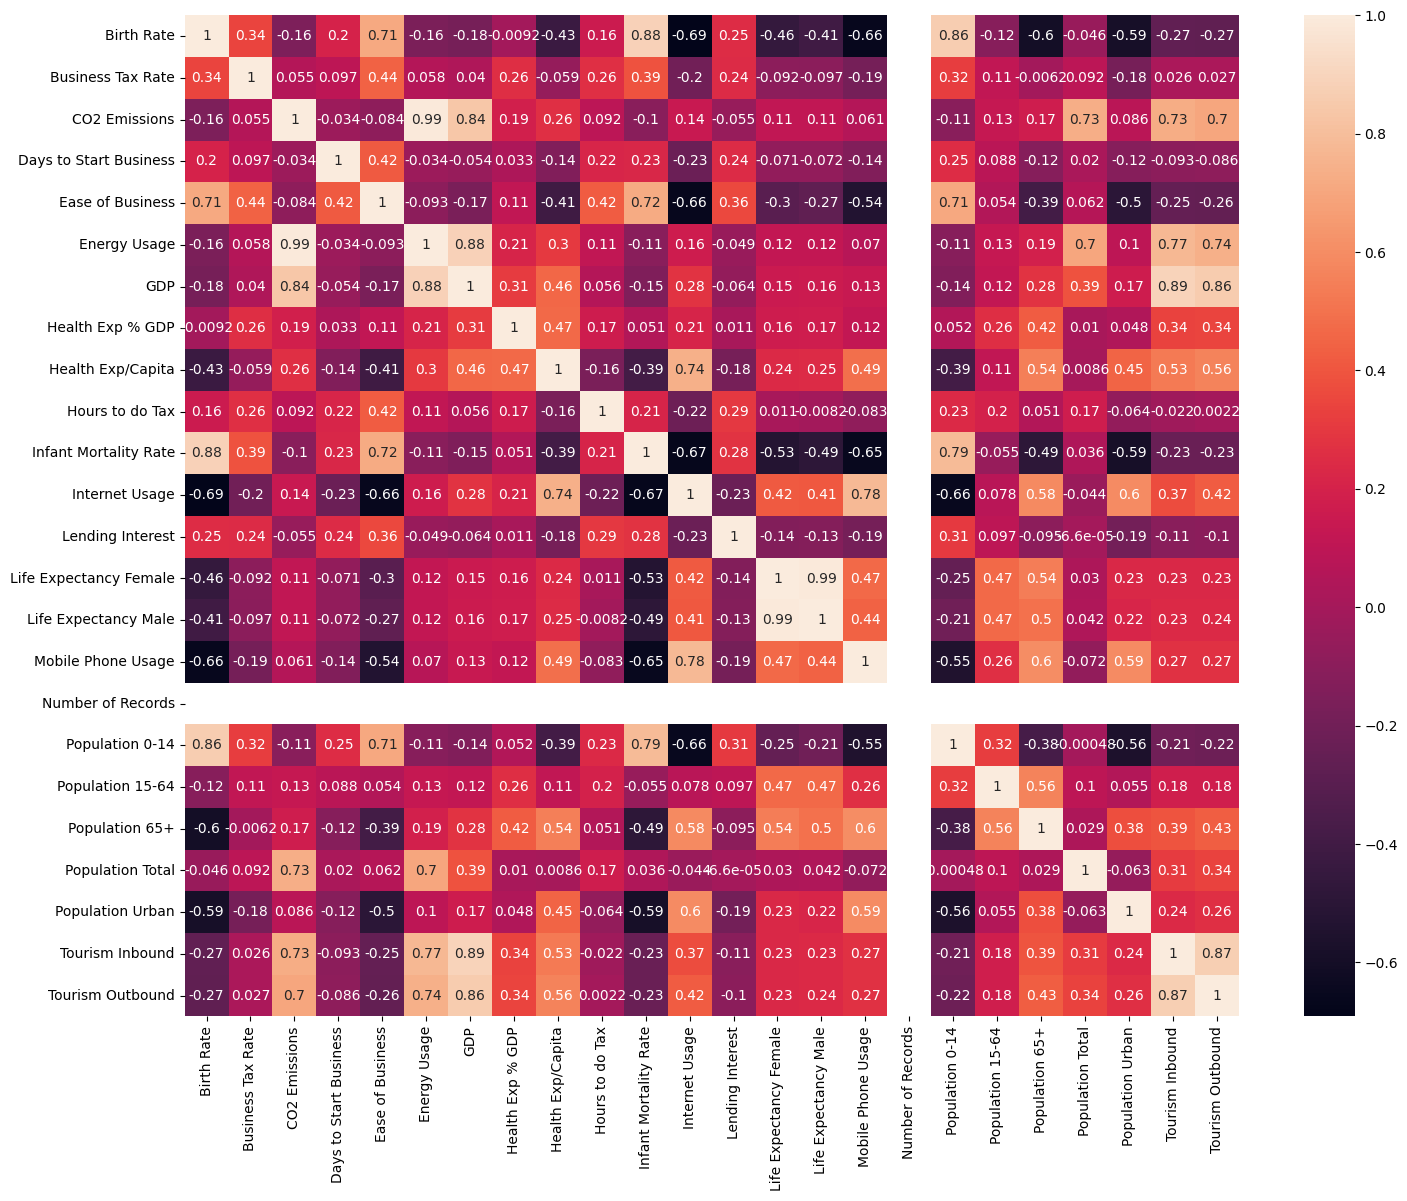

In [26]:
#plotting heatmap for Correlation
plt.figure(figsize=(17, 13))
sns.heatmap(df_merged.corr(), annot=True)






#### Birthrate has strong positive correlation with Population 0-14, infant Mortality Rate and strong Negative correlation with Life Expectancy Male, Life Expectancy FeMale
#### Co2 Emission has strong correlation with Tourism Outbound, Tourism Inbound, Population Total, GDP and Energy Usage.
#### Ease of Business has a Neagtive correlation with Internet Usage
#### Energy Usage has Positive correlation with Tourism Outbound, Tourism Inbound, GDP and Co2 Emission.
#### GDP has positive correlation with Tourism Outbound, Tourism Inbound, Energy Usage and Co2 Emission.
#### Infant Mortality rate has a positive correlation with Population 0-14, Birthrate and Negative correlation with Life Expectancy Male, Life Expectancy FeMale.
#### Internet usage has a positive correlation with Life Expectancy Male, Mobile Phone usage, Health exp/Capita and Negative correlation with Ease of Business
#### Life Expectancy Female has a negative correlation with population 0-14,infrant mortality rate,Ease of business,Birth rate and strong positive correlation with Life Expectancy male,internet usage
#### Life Expectancy male has strong correlation with Life Expectancy Female and negative correlation with birthrate,infrant moratality rate
#### Mobile phone usage has a positive correlation with internet usage
#### Population 0-14 has a positive correlation with birth rate and negative correlation with Life Expectancy Female,Life Expectancy male
#### Total population has a positive correlation with CO2 Emission,Energy Usage
#### Tourism Inbound has a strong positive correlation with Tourism Outbound,GDP,Ease of business,CO2 Emissions
#### Tourism Outbound has a strong positive correlation with GDP,Ease of business,CO2 Emissions

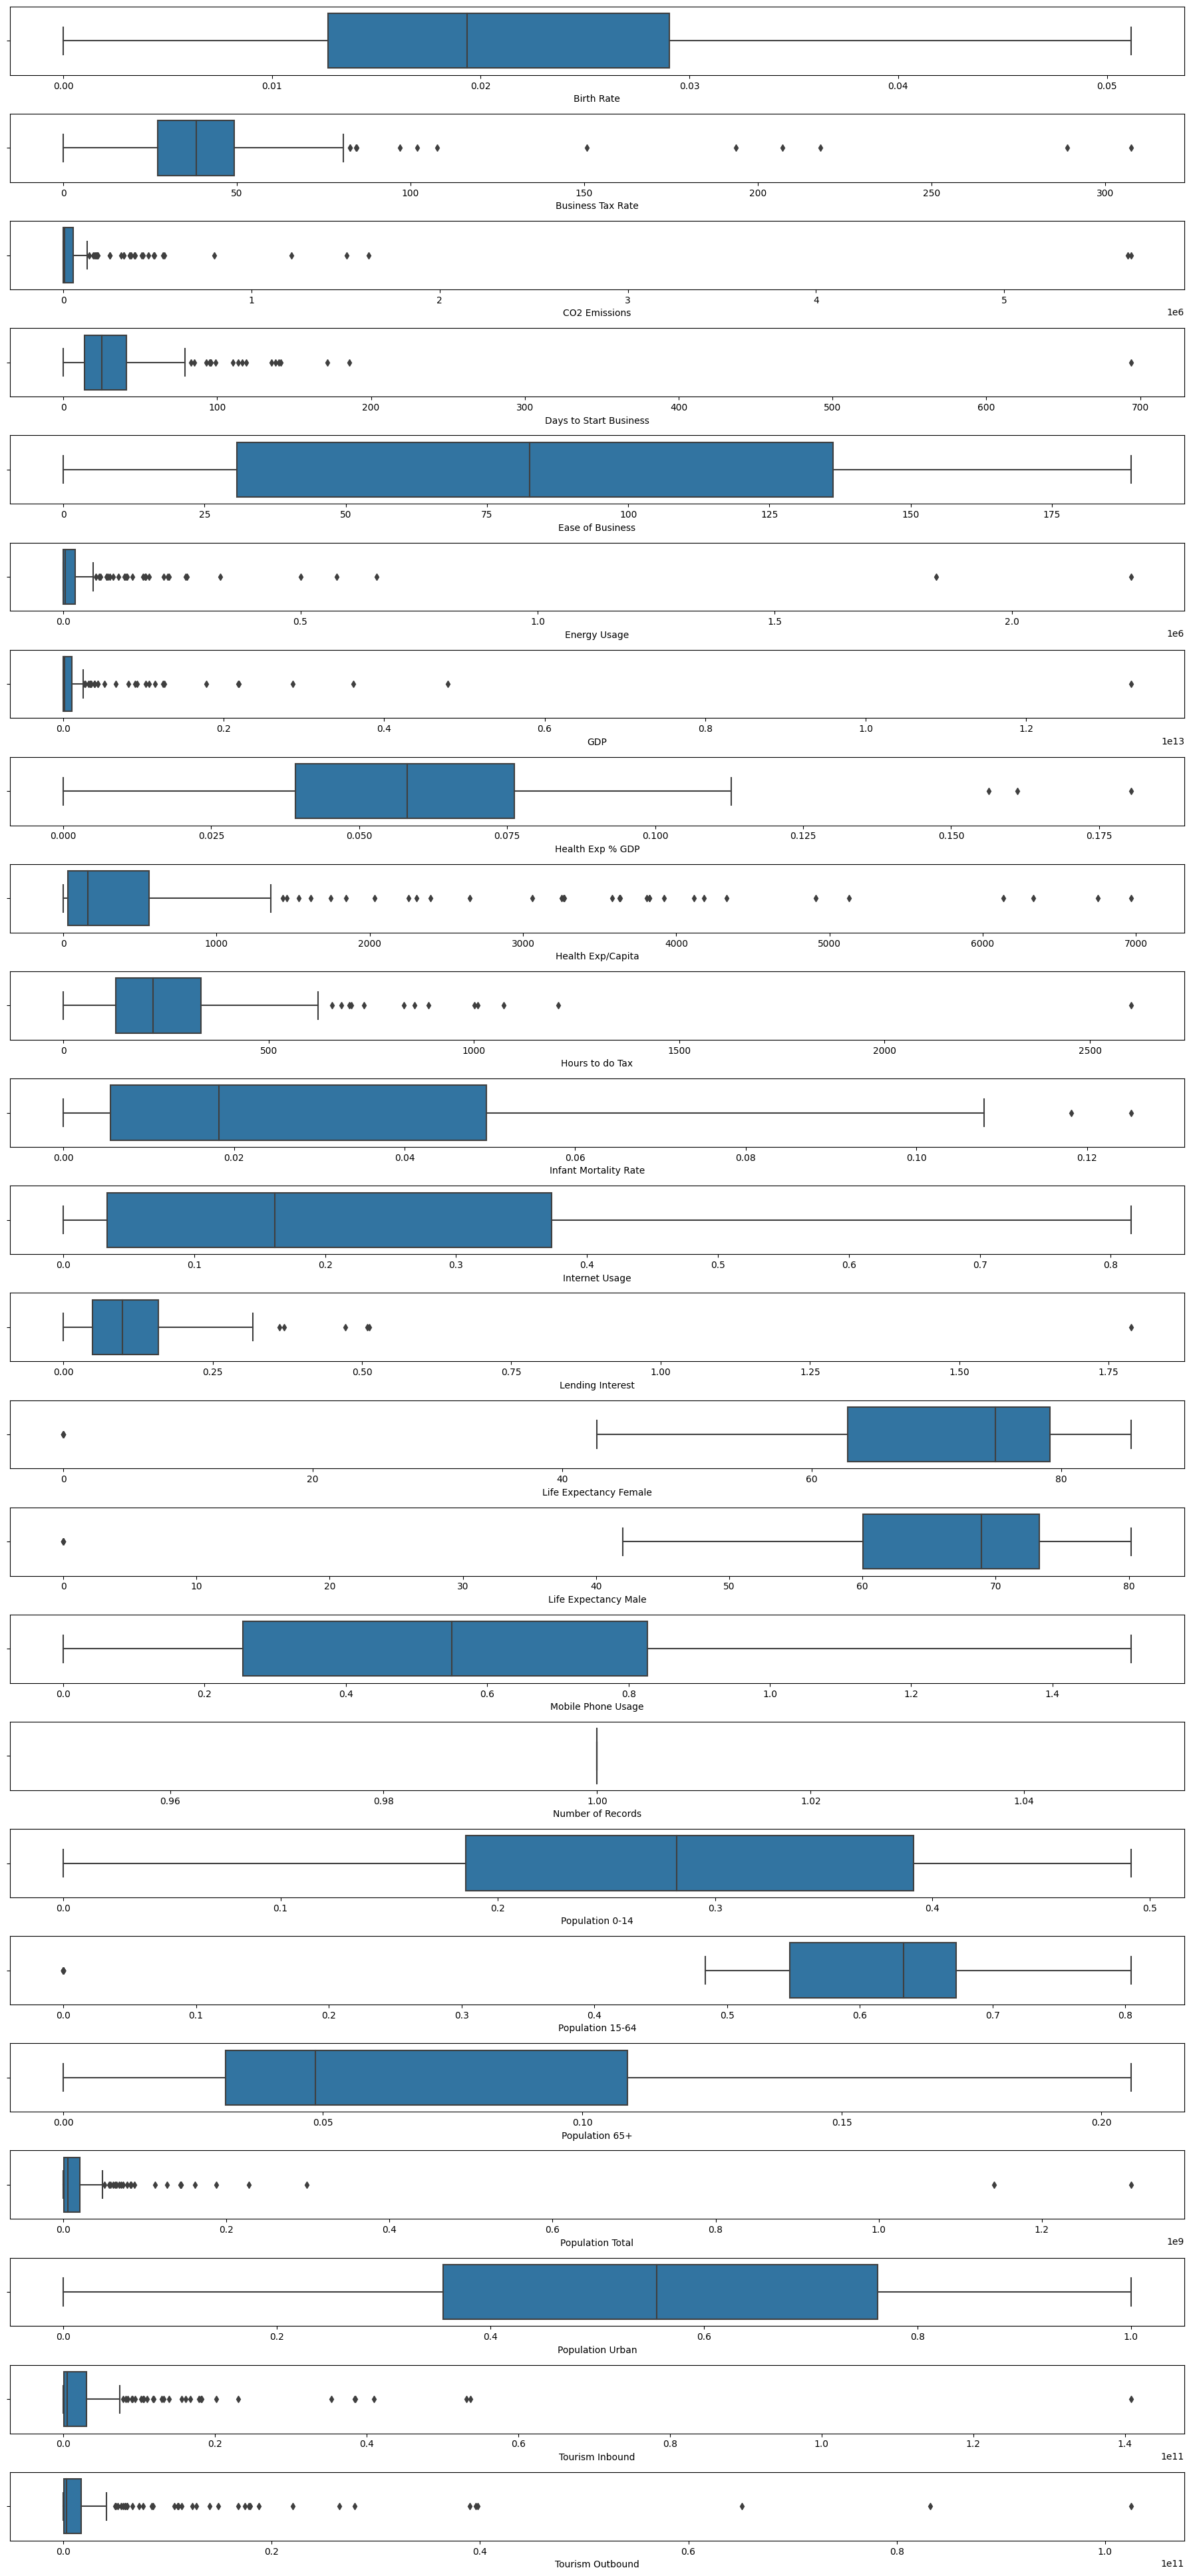

In [27]:
plt.figure(figsize=(18,40))
for i, j in enumerate(df_merged.columns):
    plt.subplot(25,1, i+1)
    sns.boxplot(x=df_merged[j])
    plt.xlabel(j)
    plt.tight_layout()

#### birth rate,Ease of business,Interbet usage,mobile phone usage,number of records,population0-14,Population65+,Population Urban has not found any outliers and all other columns has outliers 

In [28]:
df1 = df_merged.copy()

In [29]:
df1.reset_index(inplace=True)

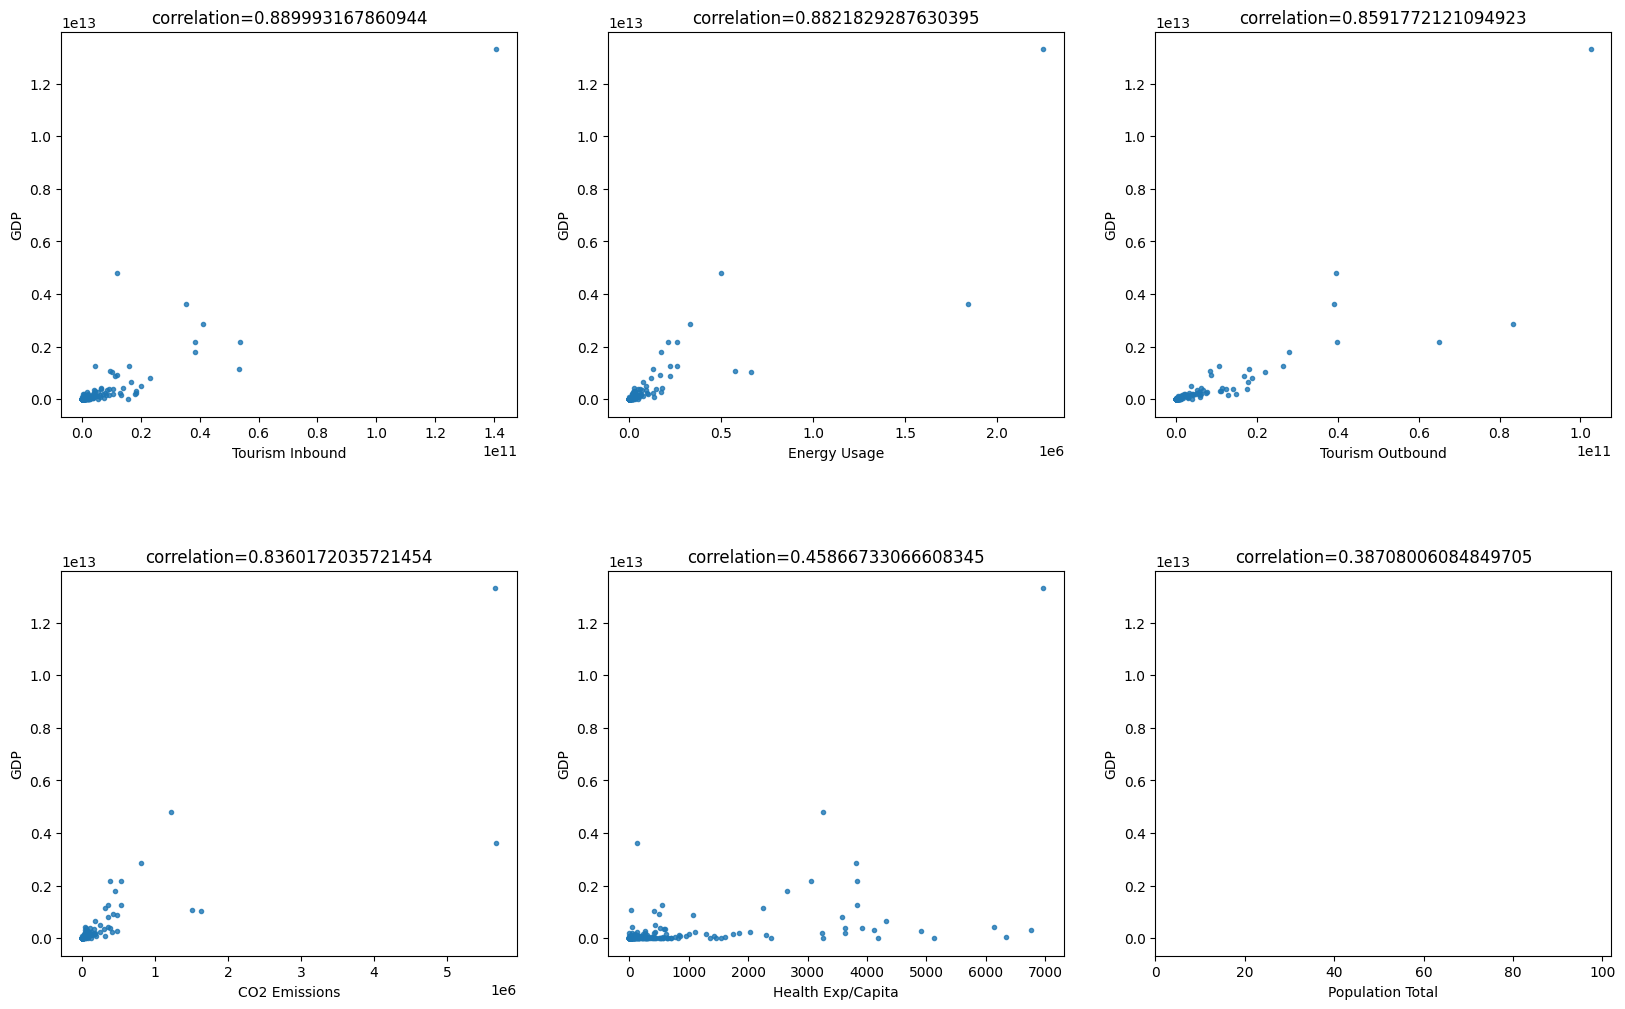

In [30]:
# Checking factors effecting GDP
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in df1.columns.values[2:]:
    if ((col!='GDP')&(col!='Country')):
        corr_to_gdp[col] = df1['GDP'].corr(df1[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP', data=df1,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

In [31]:
df.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Country',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

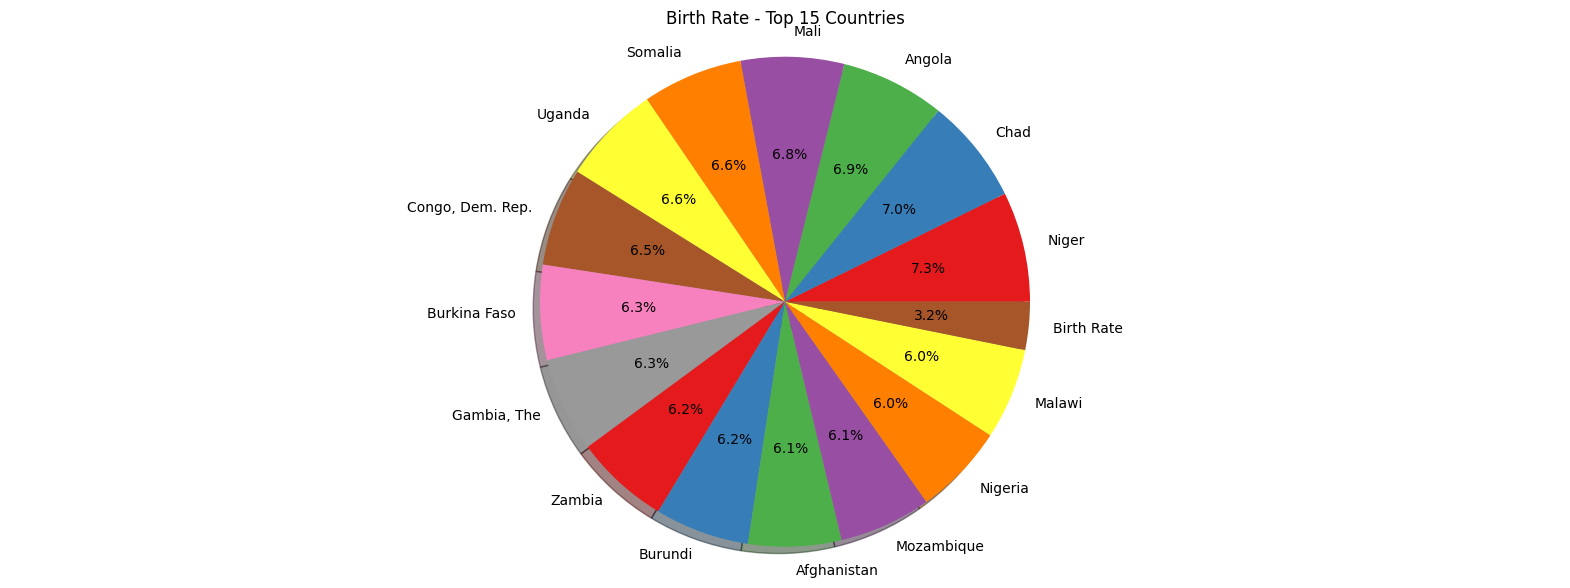

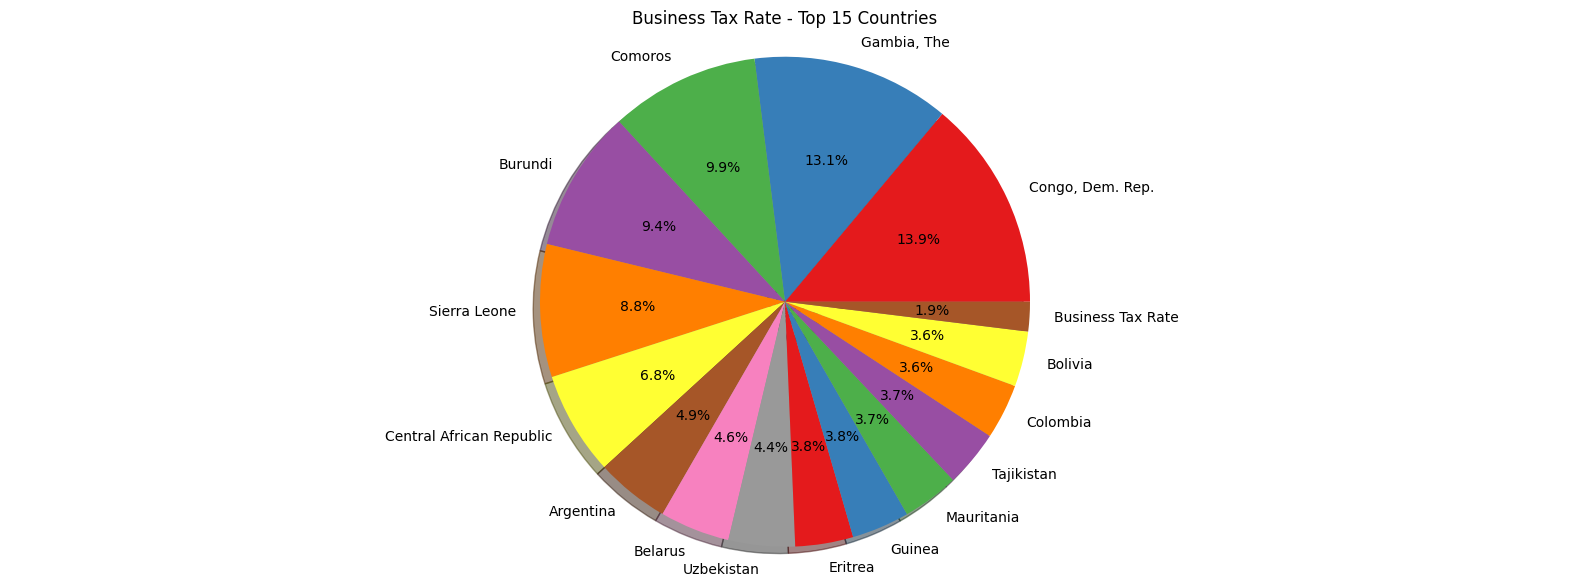

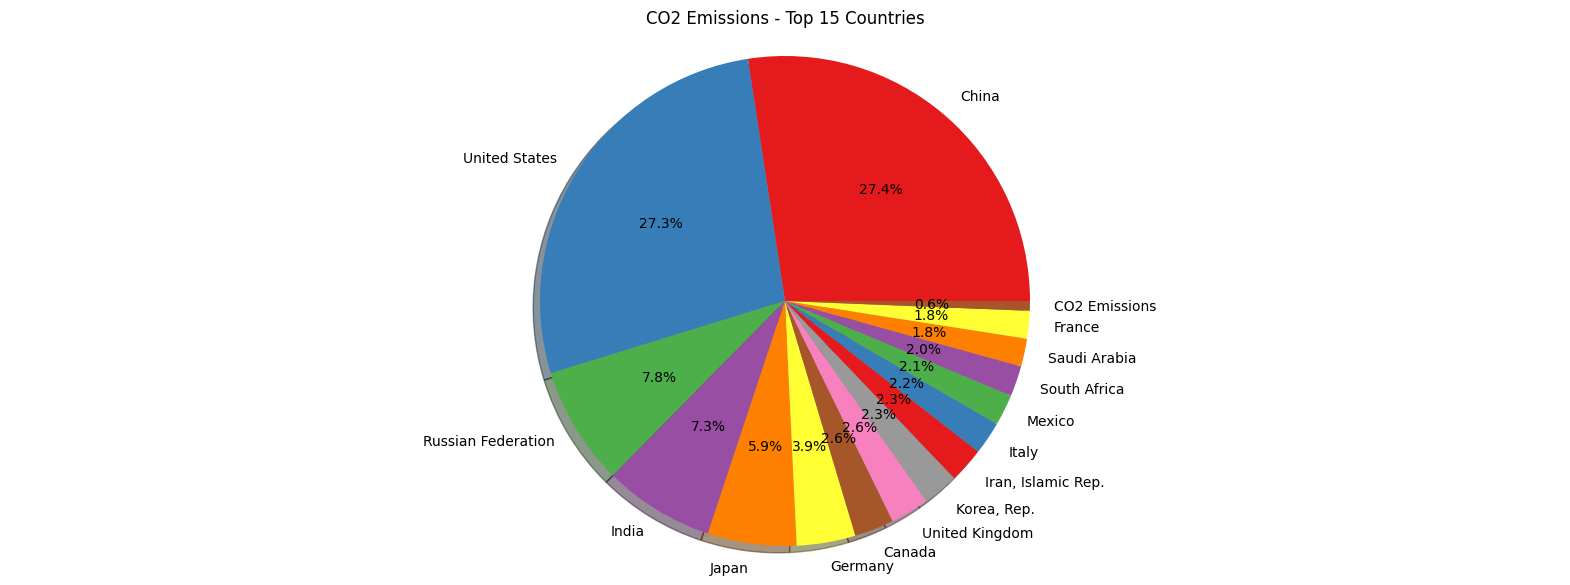

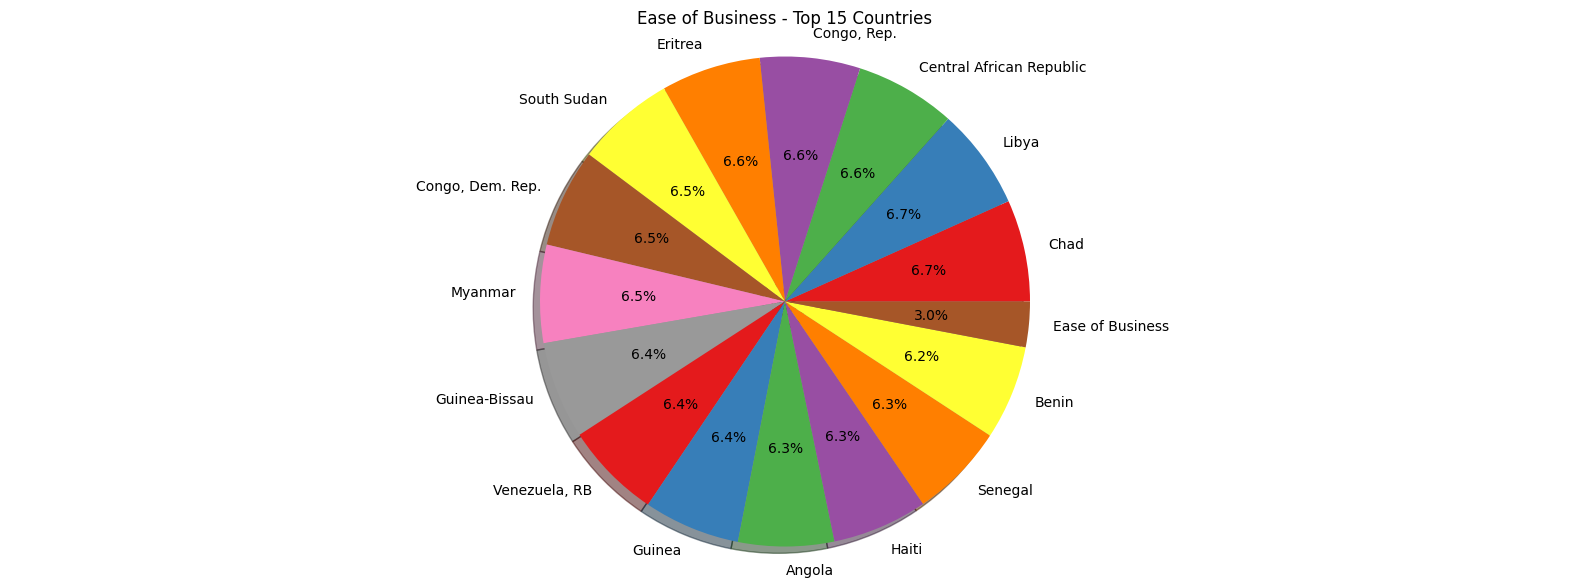

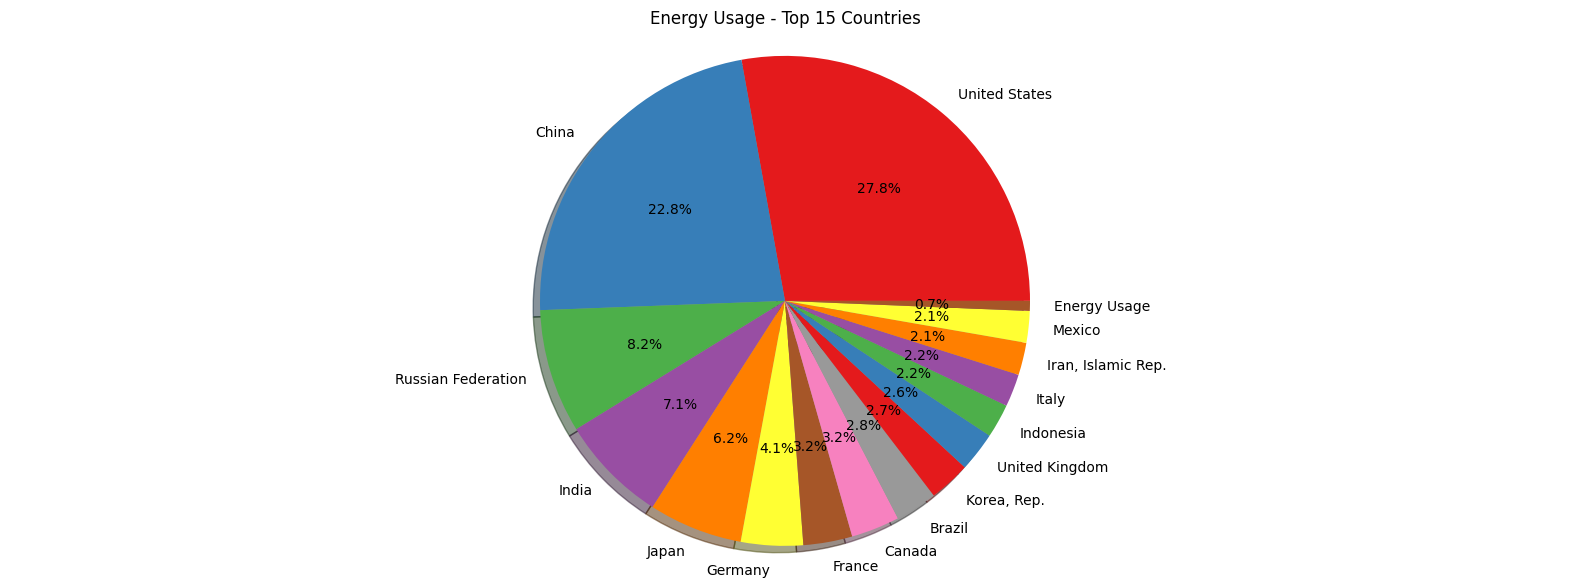

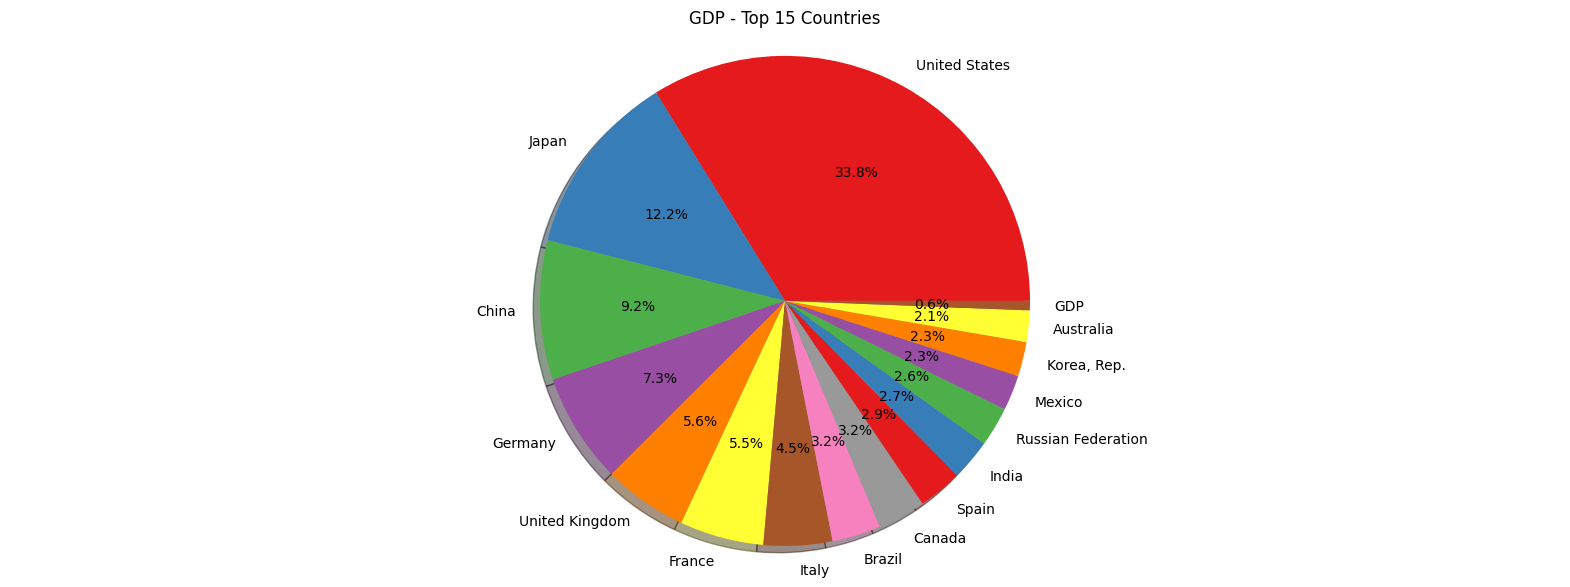

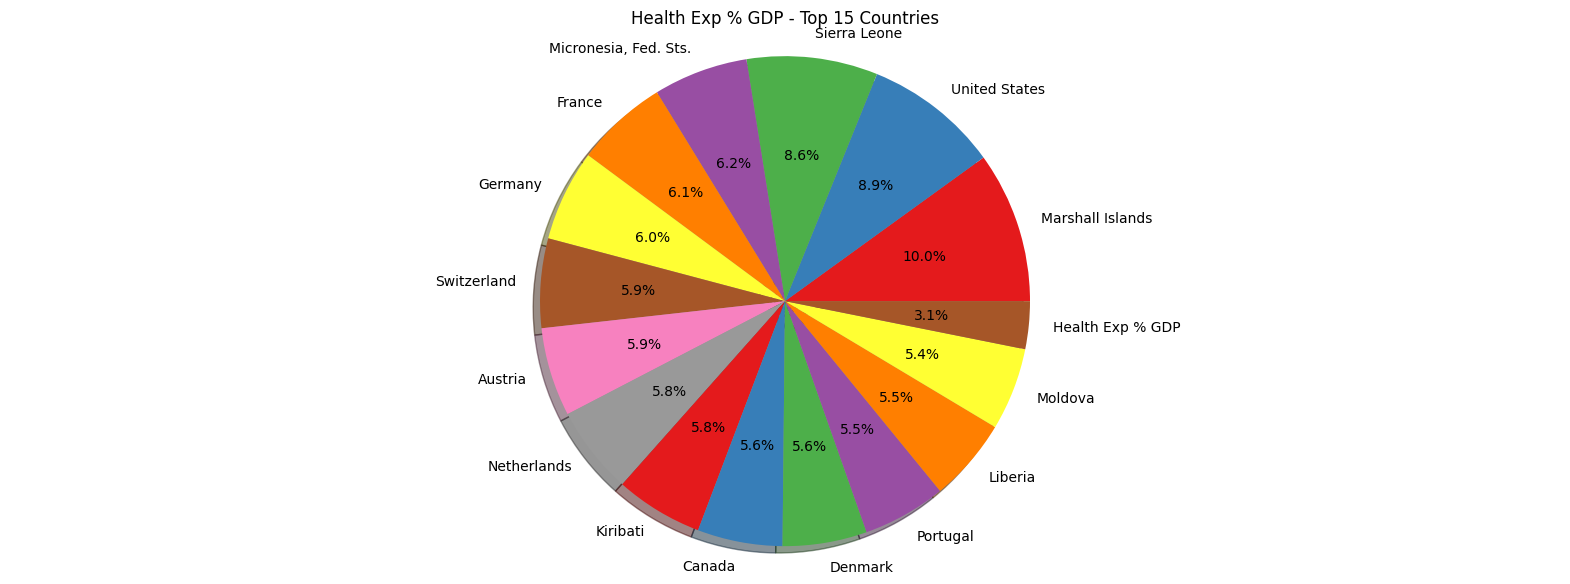

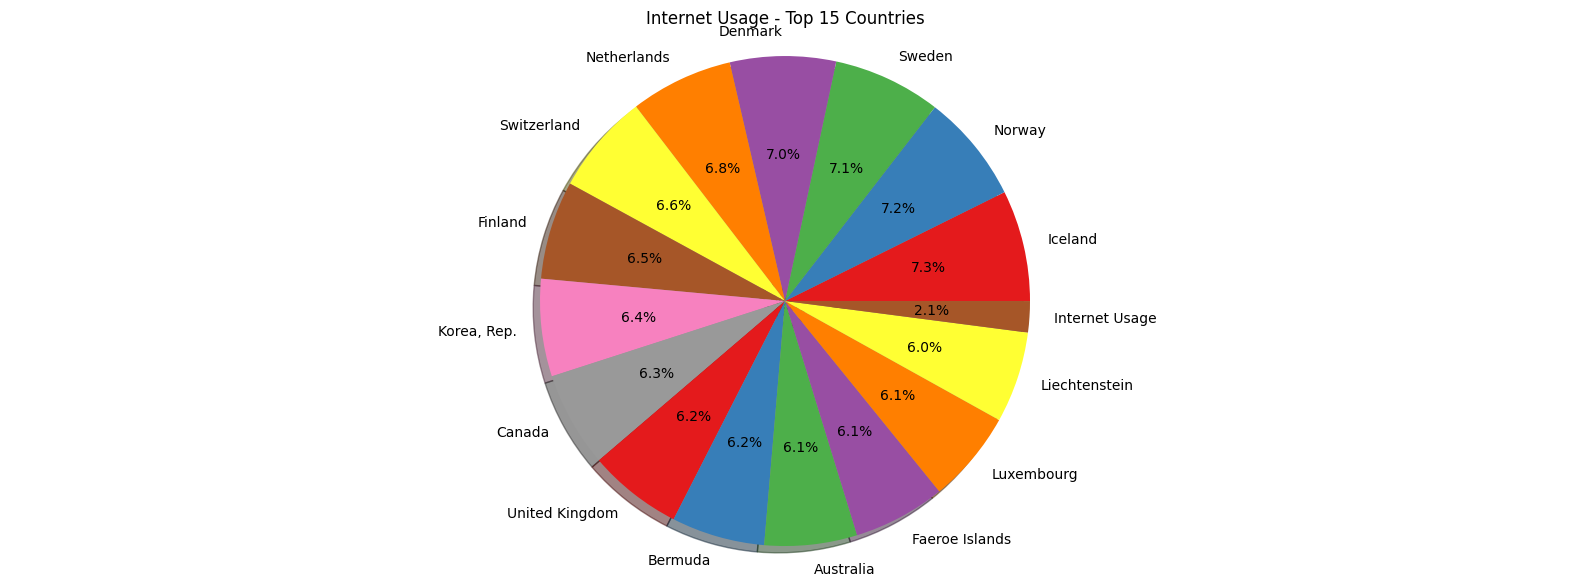

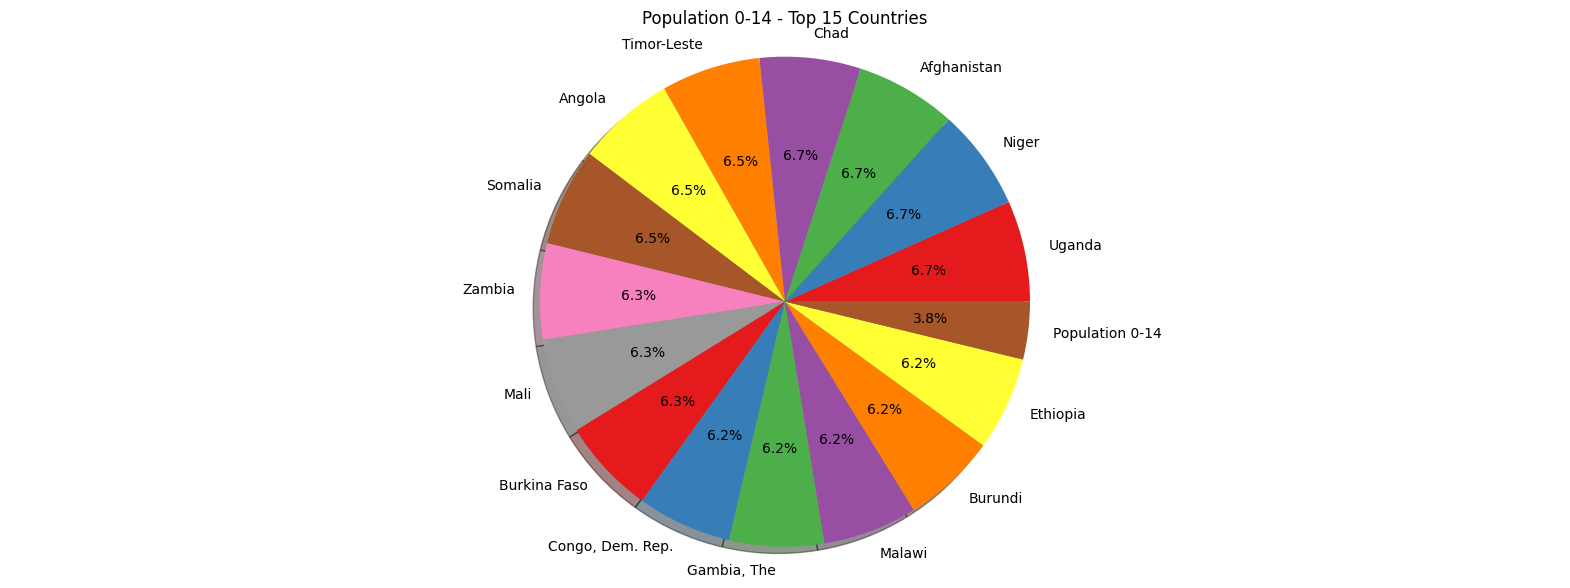

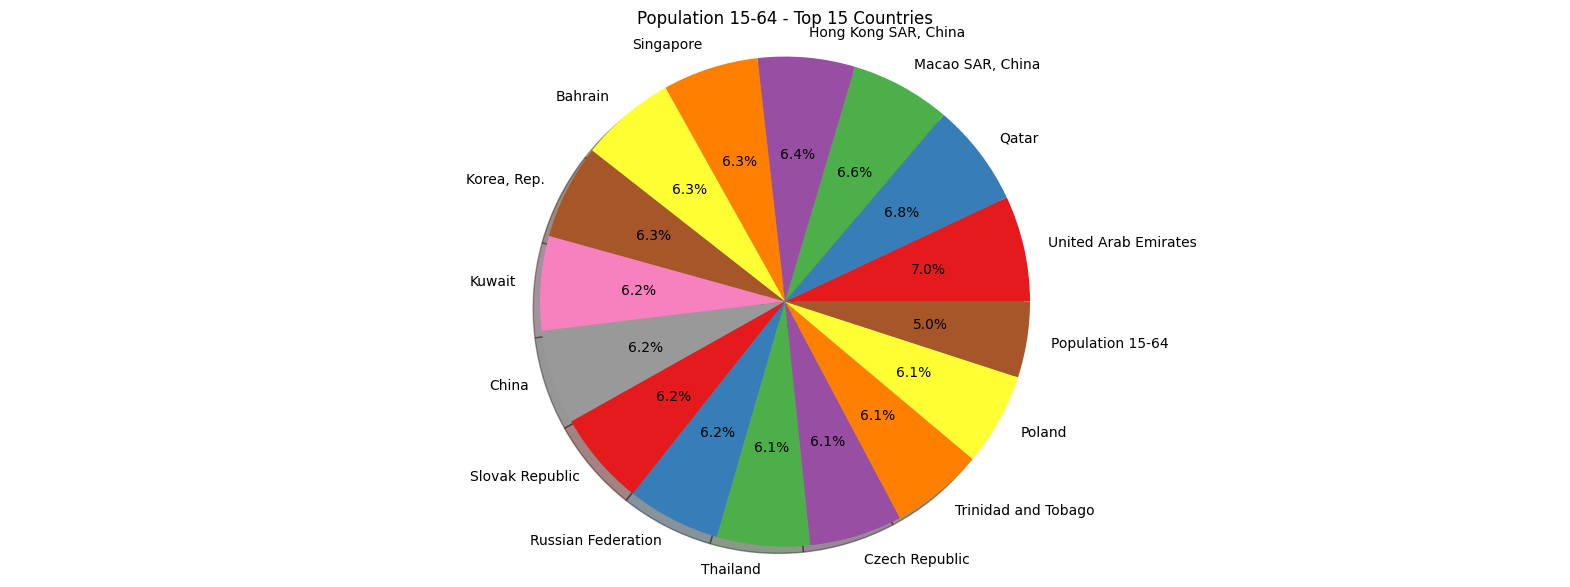

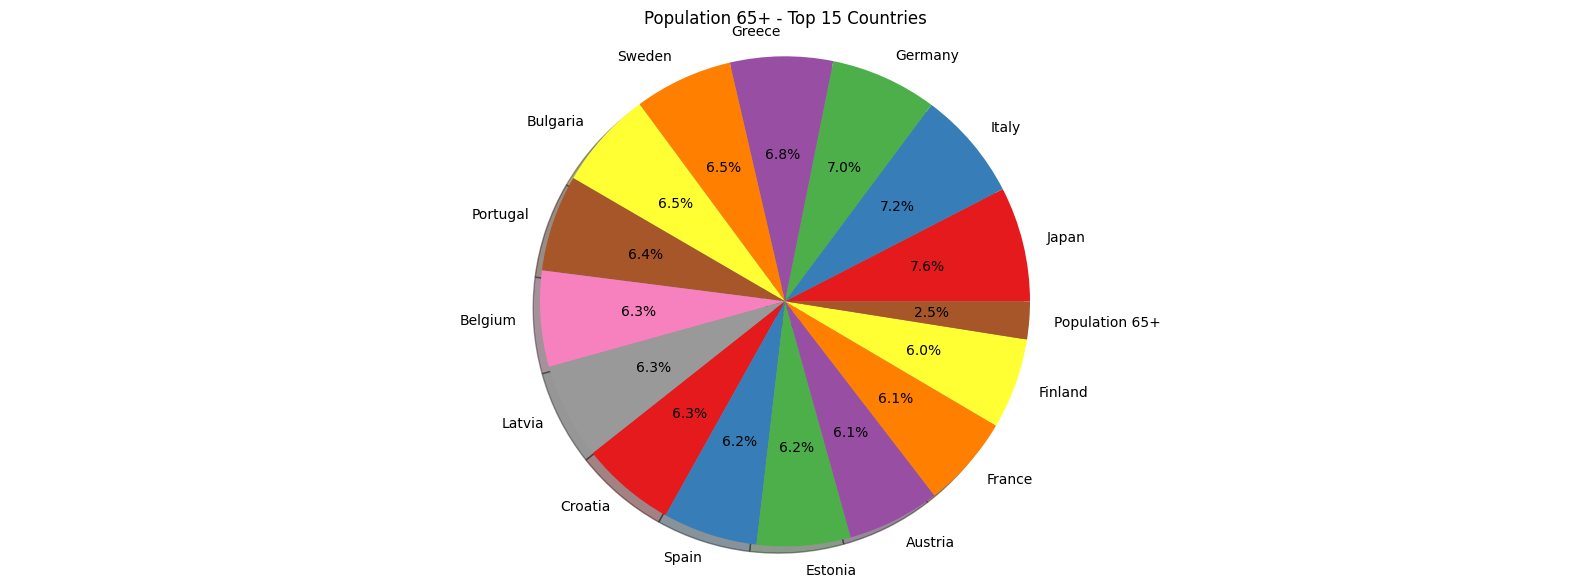

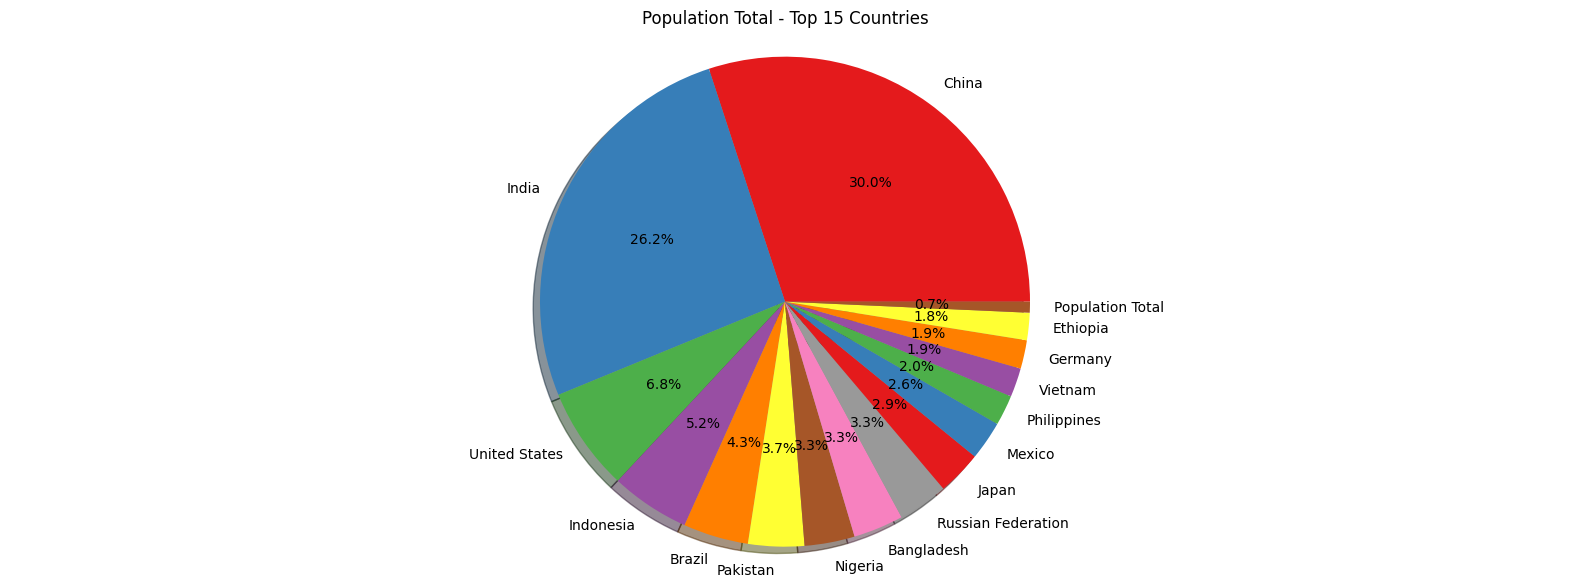

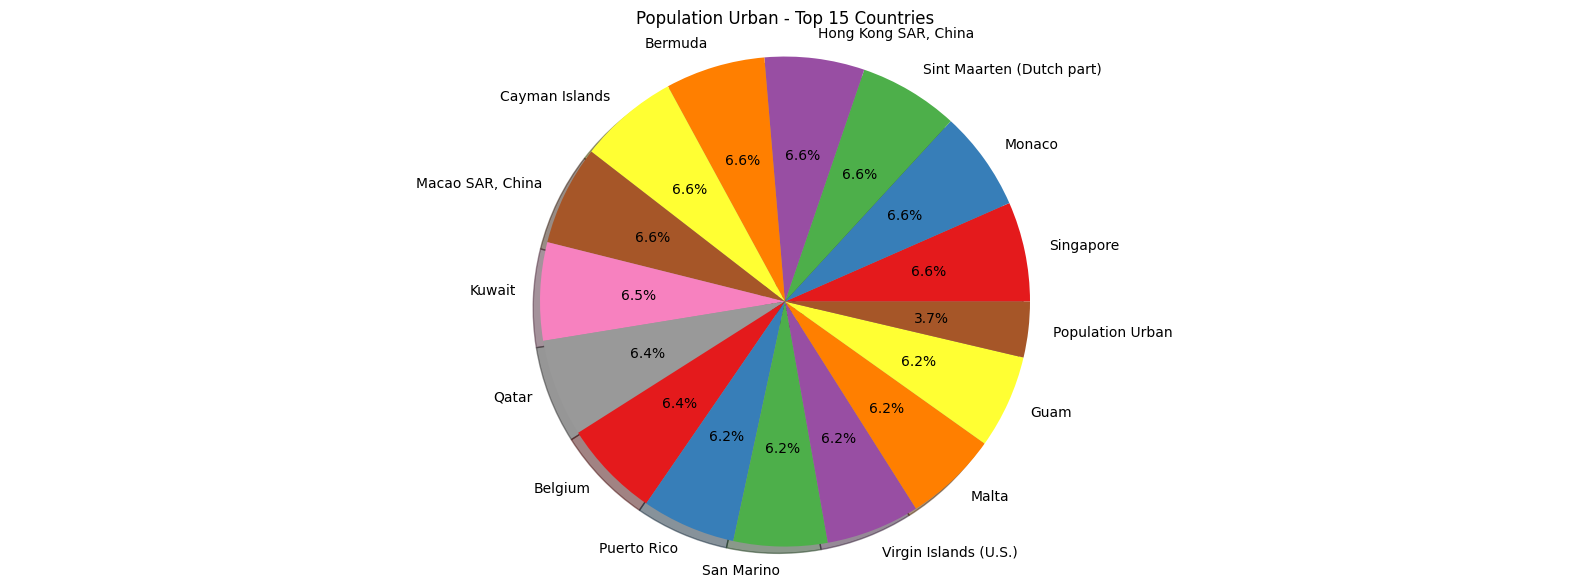

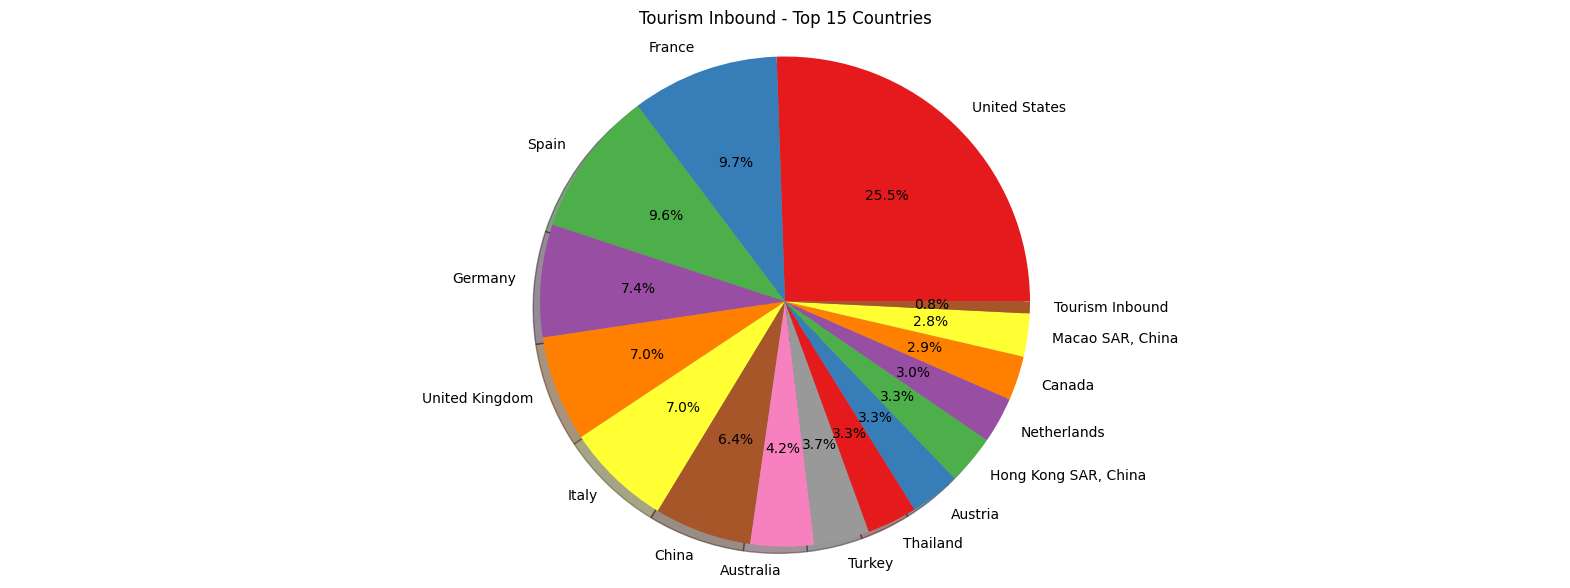

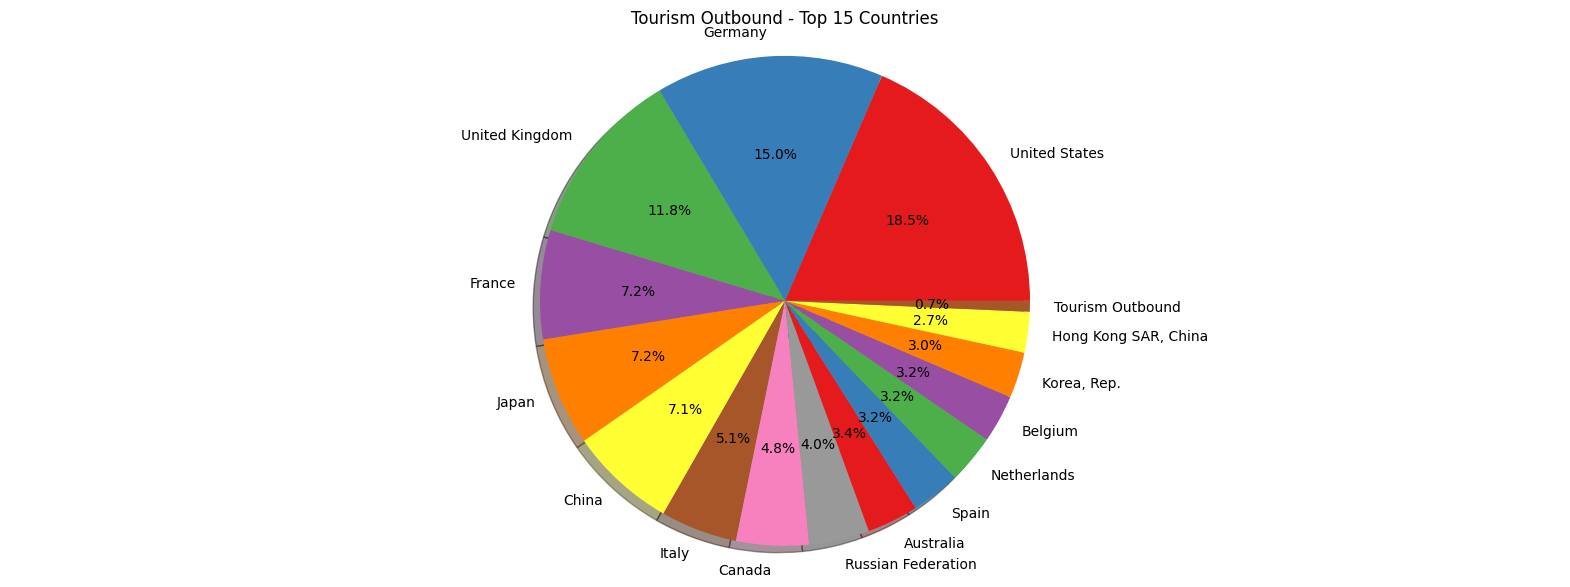

In [32]:
# Plotting pie plots
cols = ['Birth Rate', 'Business Tax Rate', 'CO2 Emissions', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP','Internet Usage', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound']
for col in cols:
    top_values = df1.sort_values(col,ascending=False).head(15)
    mean = pd.DataFrame({'Country':[col], col:[df1[col].mean()]})
    combined = pd.concat([top_values[['Country',col]],mean],ignore_index=True)
    
    fig, ax = plt.subplots(figsize=(20,7))
    plt.title(col + ' - Top 15 Countries')
    colors = sns.color_palette("Set1", combined.shape[0]).as_hex()
    ax.pie(combined[col], labels=combined['Country'],colors=colors,autopct='%1.1f%%',shadow=True)
    ax.axis('equal')
    plt.show()

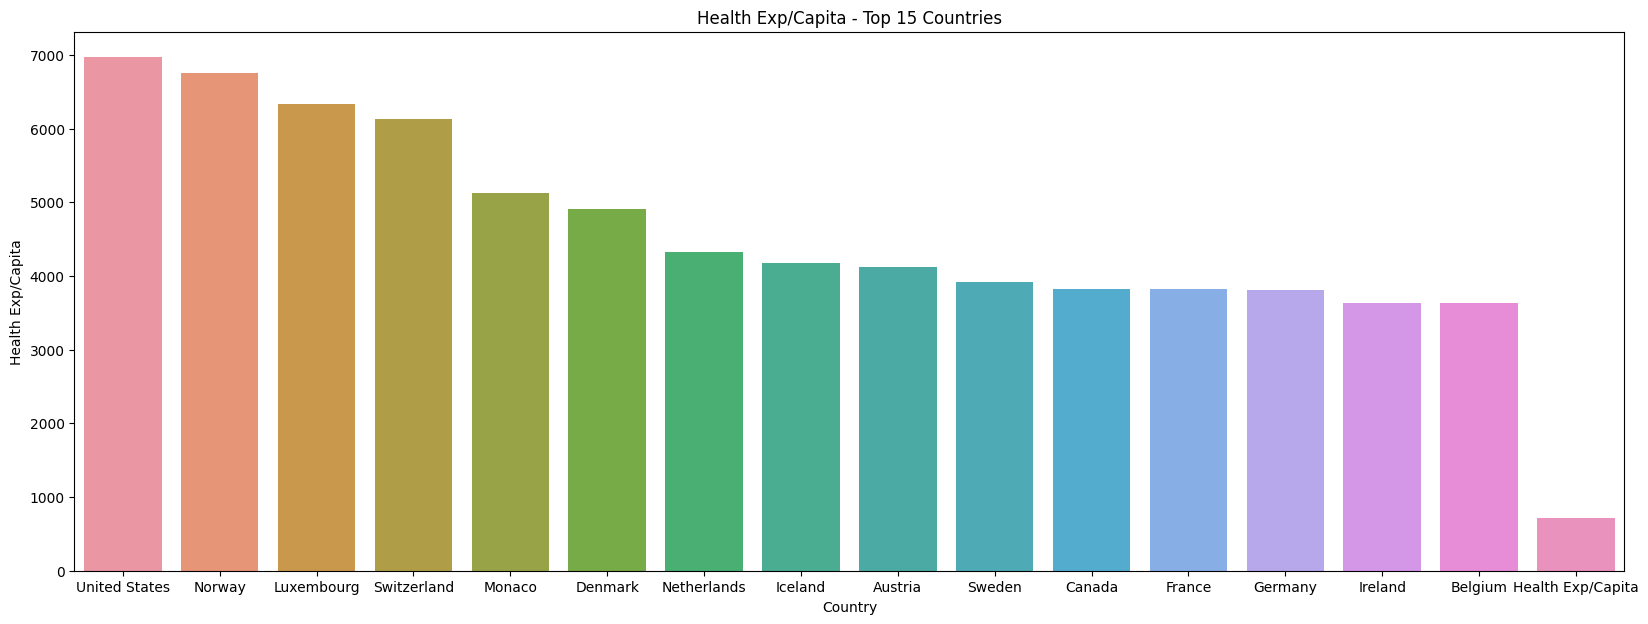

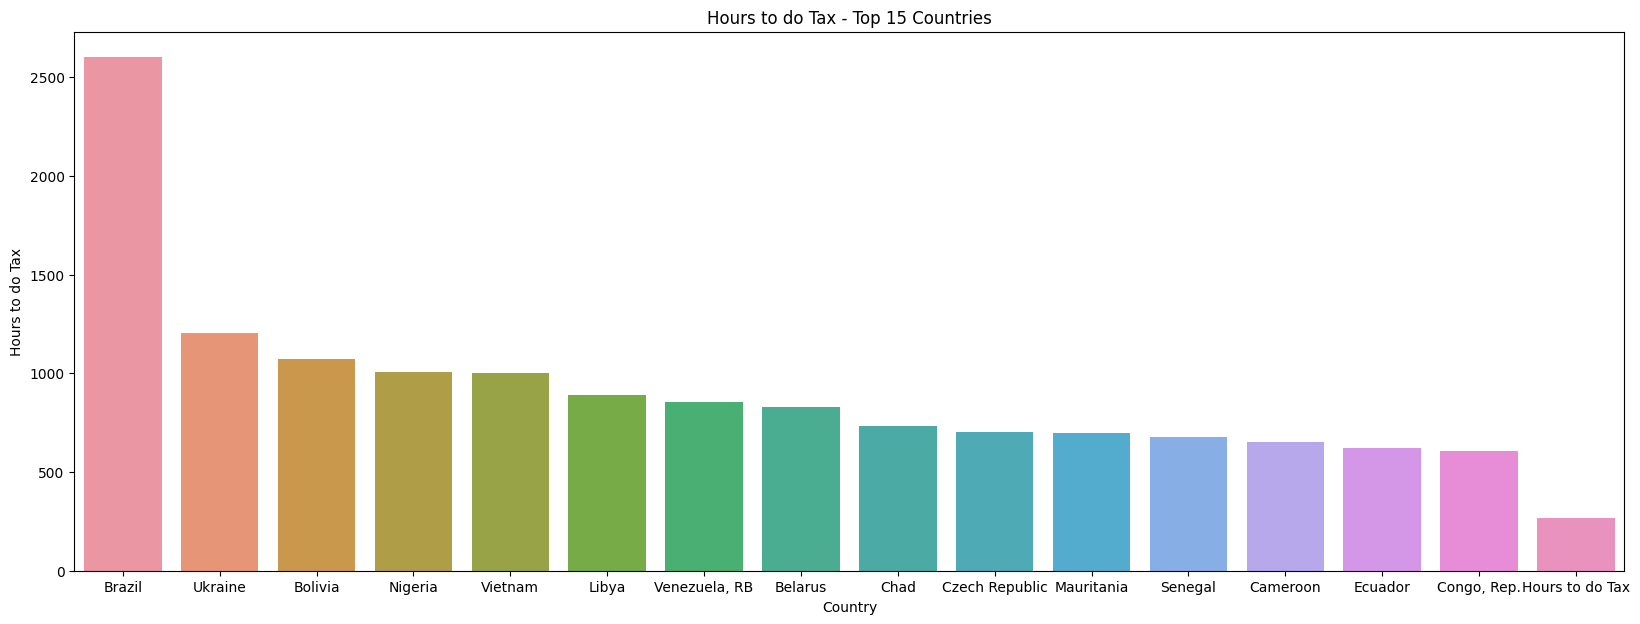

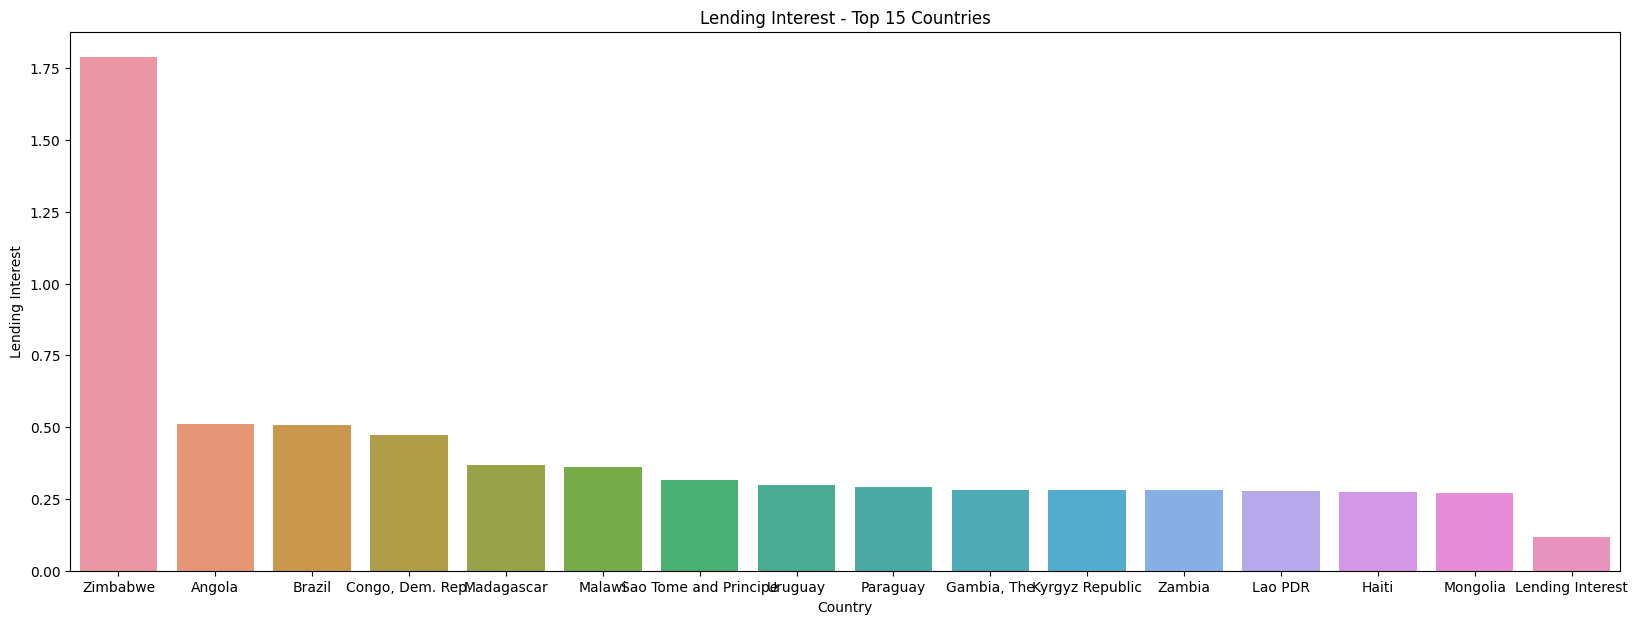

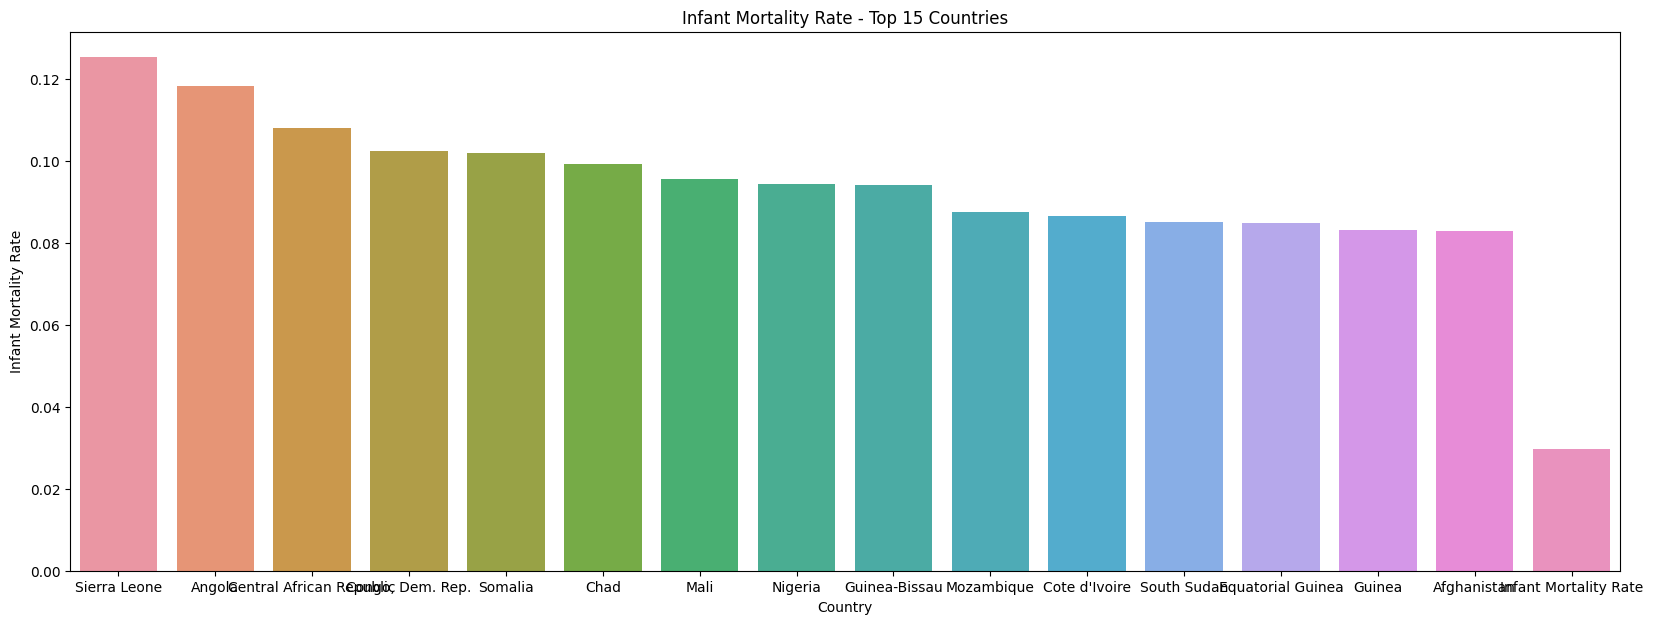

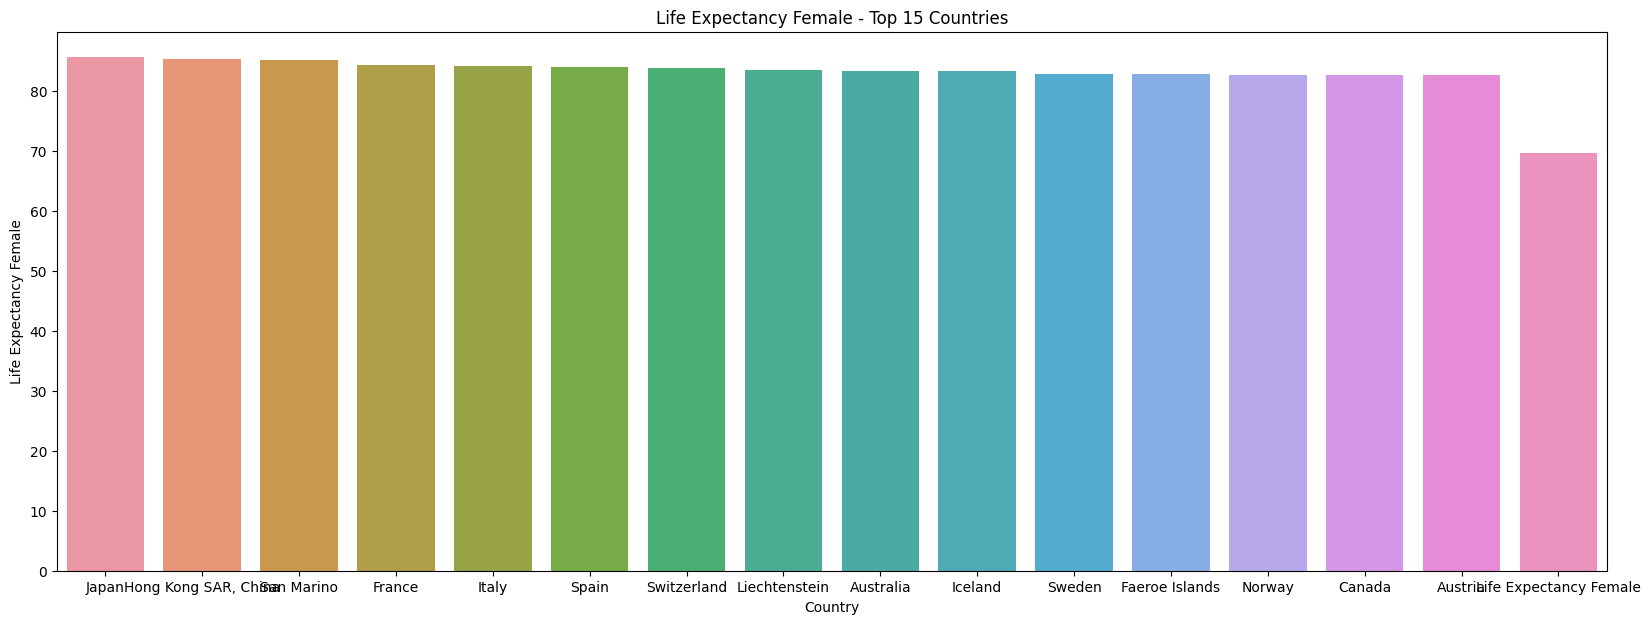

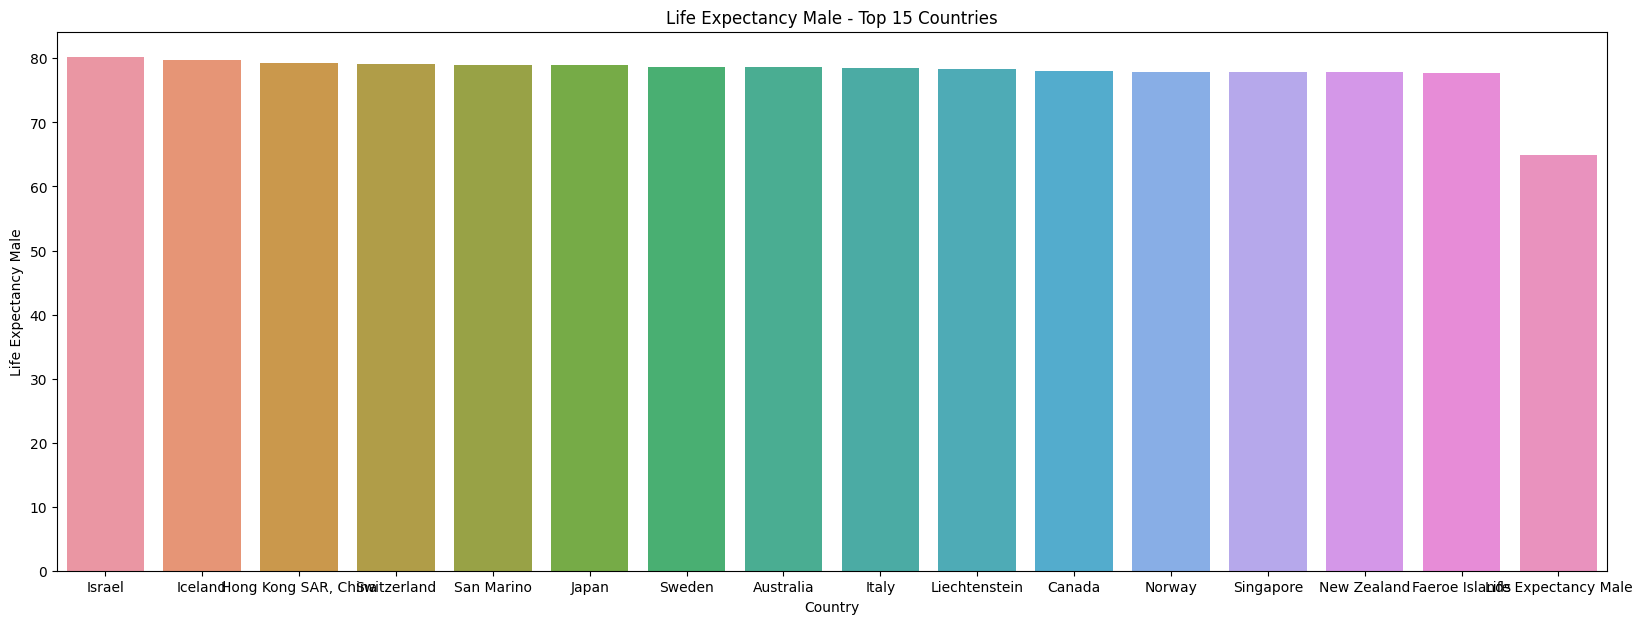

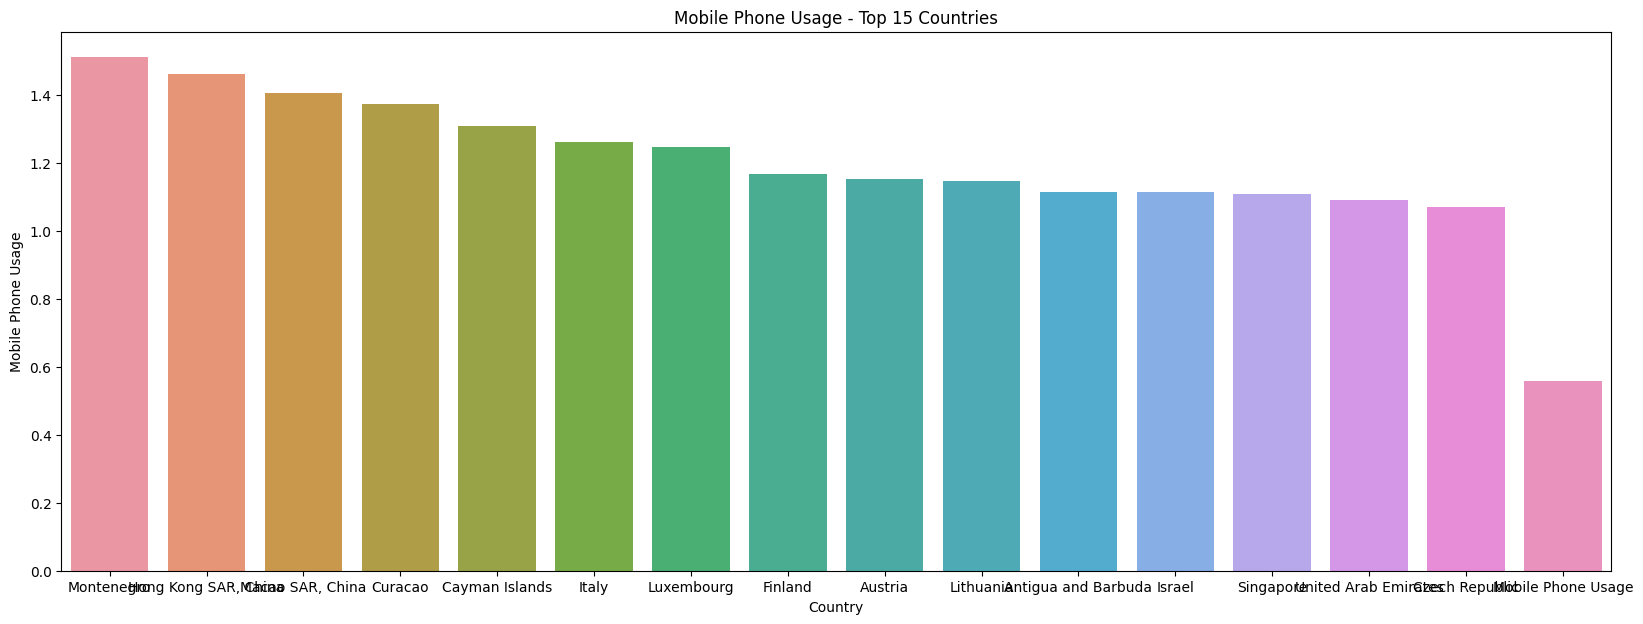

In [33]:
# Checking for top 15 countries
cols = ['Health Exp/Capita', 'Hours to do Tax','Lending Interest','Infant Mortality Rate', 'Life Expectancy Female', 'Life Expectancy Male','Mobile Phone Usage']
for col in cols:
    top_values = df1.sort_values(col,ascending=False).head(15)
    mean = pd.DataFrame({'Country':[col], col:[df1[col].mean()]})
    combined = pd.concat([top_values[['Country',col]],mean],ignore_index=True)
    
    fig, ax = plt.subplots(figsize=(20,7))
    plt.title(col + ' - Top 15 Countries')
    sns.barplot(x='Country', y=col, data=combined)
    plt.show()

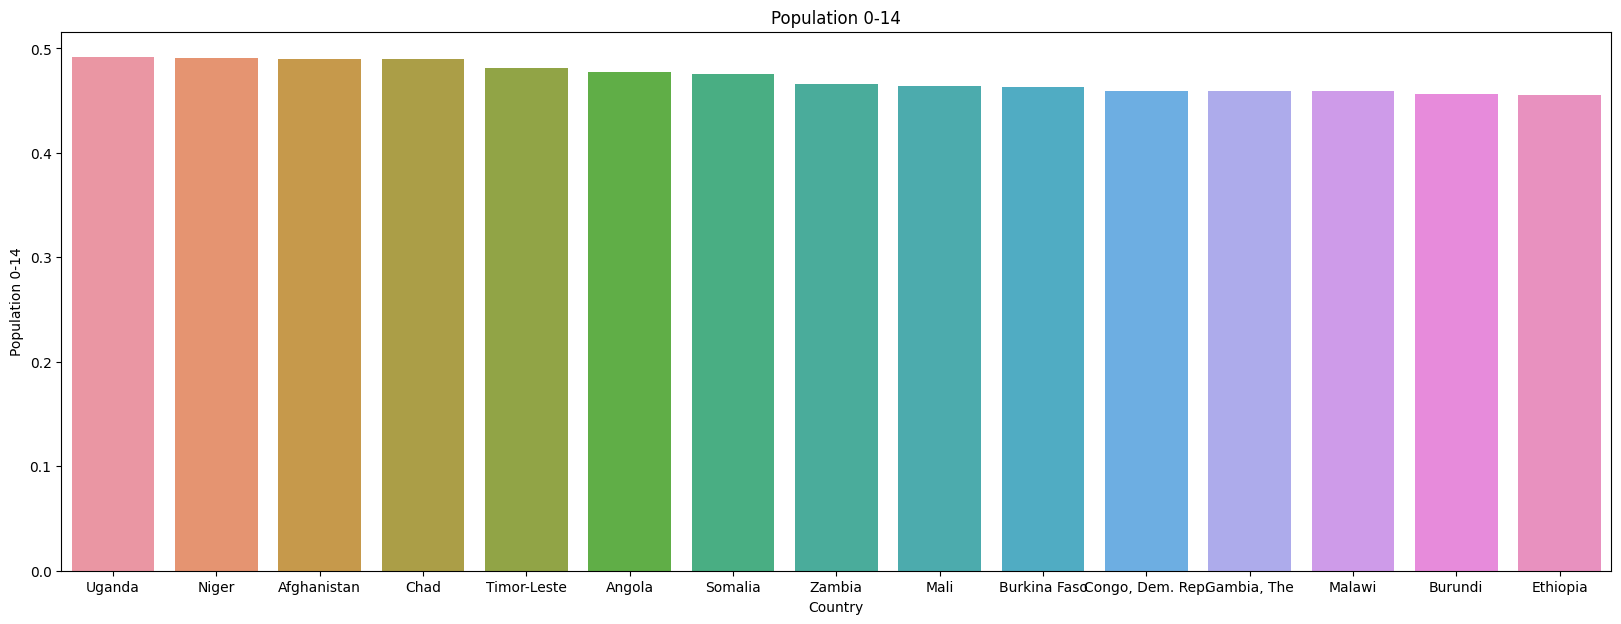

The position of Uganda in world GDP is: 111
The position of Niger in world GDP is: 145
The position of Afghanistan in world GDP is: 118
The position of Chad in world GDP is: 131
The position of Timor-Leste in world GDP is: 184
The position of Angola in world GDP is: 64
The position of Somalia in world GDP is: 198
The position of Zambia in world GDP is: 115
The position of Mali in world GDP is: 135
The position of Burkina Faso in world GDP is: 137


In [34]:
# Checking top 15 countries with Population 0-14 and there position as per GDP
fig, ax = plt.subplots(figsize=(20,7))
plt.title('Population 0-14')
sns.barplot(x='Country', y='Population 0-14', data=df1.sort_values('Population 0-14', ascending=False).head(15))
plt.show()

df1['Percentage of World GDP'] = df1['GDP'] / df1['GDP'].sum() * 100
df1.sort_values('Percentage of World GDP',ascending=False,inplace=True)
df1['Rank_GDP'] = range(1, len(df1) + 1)

top_pop = df1.sort_values('Population 0-14', ascending=False).head(10)

for country in top_pop['Country']:
  position = df1.loc[df1['Country'] == country]['Rank_GDP']
  print(f"The position of {country} in world GDP is: {position.values[0]}")

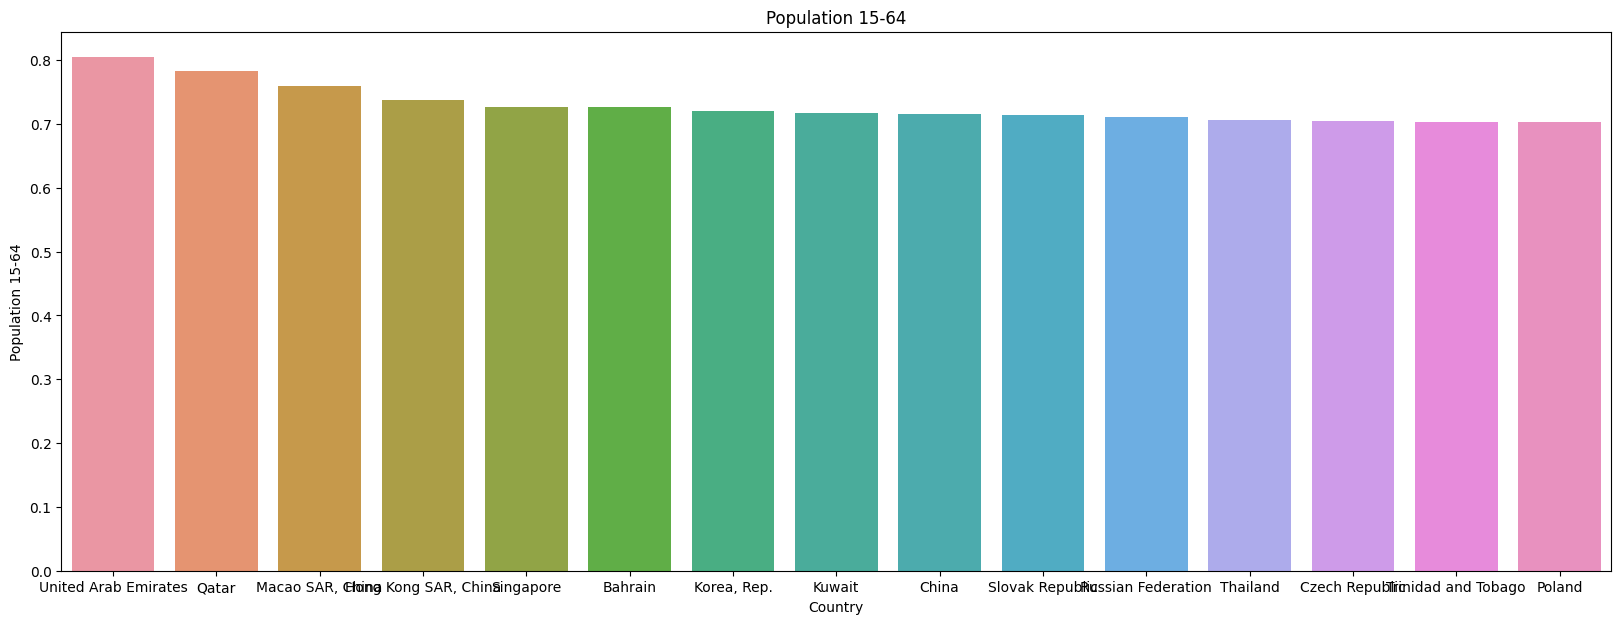

The position of United Arab Emirates in world GDP is: 32
The position of Qatar in world GDP is: 59
The position of Macao SAR, China in world GDP is: 97
The position of Hong Kong SAR, China in world GDP is: 35
The position of Singapore in world GDP is: 42
The position of Bahrain in world GDP is: 92
The position of Korea, Rep. in world GDP is: 14
The position of Kuwait in world GDP is: 55
The position of China in world GDP is: 3
The position of Slovak Republic in world GDP is: 62


In [35]:
# Checking top 15 countries with Population 15-64 and there position as per GDP
fig, ax = plt.subplots(figsize=(20,7))
plt.title('Population 15-64')
sns.barplot(x='Country', y='Population 15-64', data=df1.sort_values('Population 15-64', ascending=False).head(15))
plt.show()

df1['Percentage of World GDP'] = df1['GDP'] / df1['GDP'].sum() * 100
df1.sort_values('Percentage of World GDP',ascending=False,inplace=True)
df1['Rank_GDP'] = range(1, len(df1) + 1)

top_pop = df1.sort_values('Population 15-64', ascending=False).head(10)

for country in top_pop['Country']:
  position = df1.loc[df1['Country'] == country]['Rank_GDP']
  print(f"The position of {country} in world GDP is: {position.values[0]}")

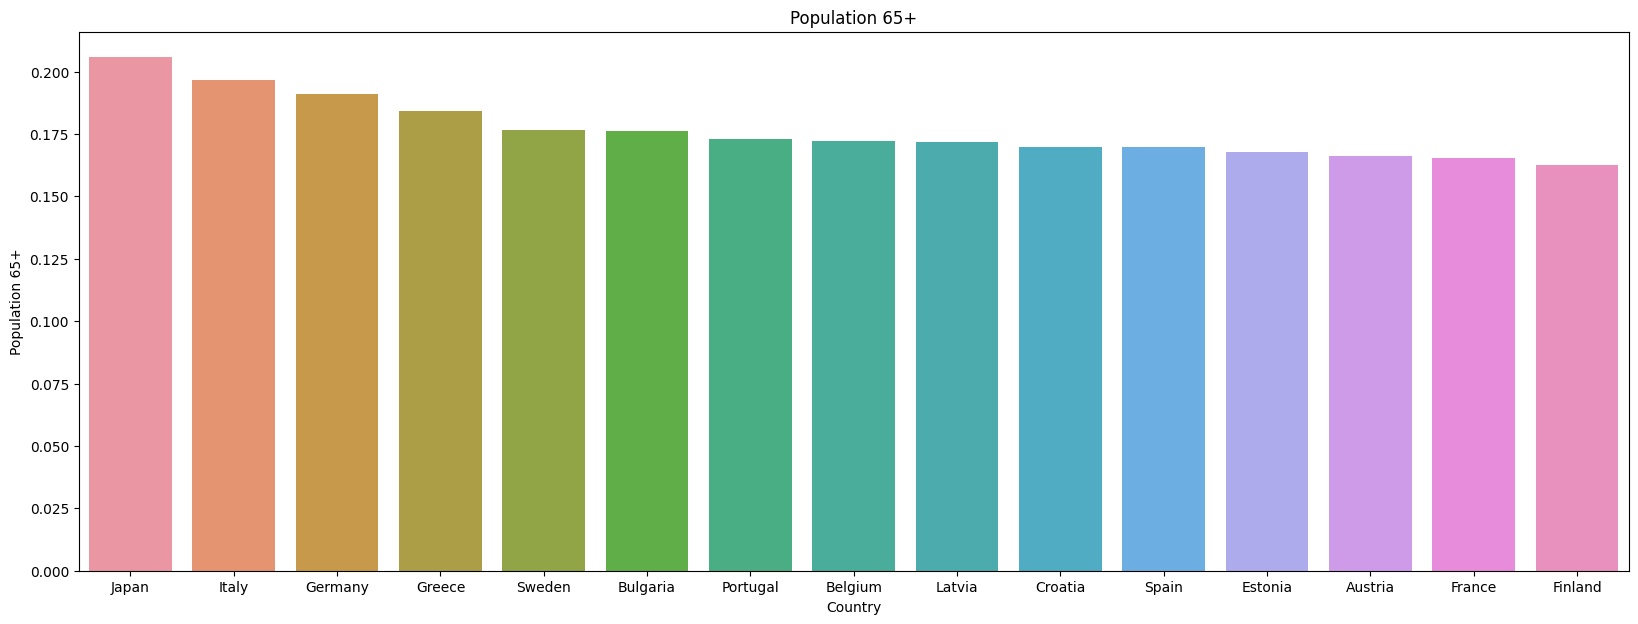

The position of Japan in world GDP is: 2
The position of Italy in world GDP is: 7
The position of Germany in world GDP is: 4
The position of Greece in world GDP is: 30
The position of Sweden in world GDP is: 21
The position of Bulgaria in world GDP is: 75
The position of Portugal in world GDP is: 36
The position of Belgium in world GDP is: 20
The position of Latvia in world GDP is: 90
The position of Croatia in world GDP is: 67


In [36]:
# Checking top 15 countries with Population 65+ and there position as per GDP
fig, ax = plt.subplots(figsize=(20,7))
plt.title('Population 65+')
sns.barplot(x='Country', y='Population 65+', data=df1.sort_values('Population 65+', ascending=False).head(15))
plt.show()

df1['Percentage of World GDP'] = df1['GDP'] / df1['GDP'].sum() * 100
df1.sort_values('Percentage of World GDP',ascending=False,inplace=True)
df1['Rank_GDP'] = range(1, len(df1) + 1)

top_pop = df1.sort_values('Population 65+', ascending=False).head(10)

for country in top_pop['Country']:
  position = df1.loc[df1['Country'] == country]['Rank_GDP']
  print(f"The position of {country} in world GDP is: {position.values[0]}")

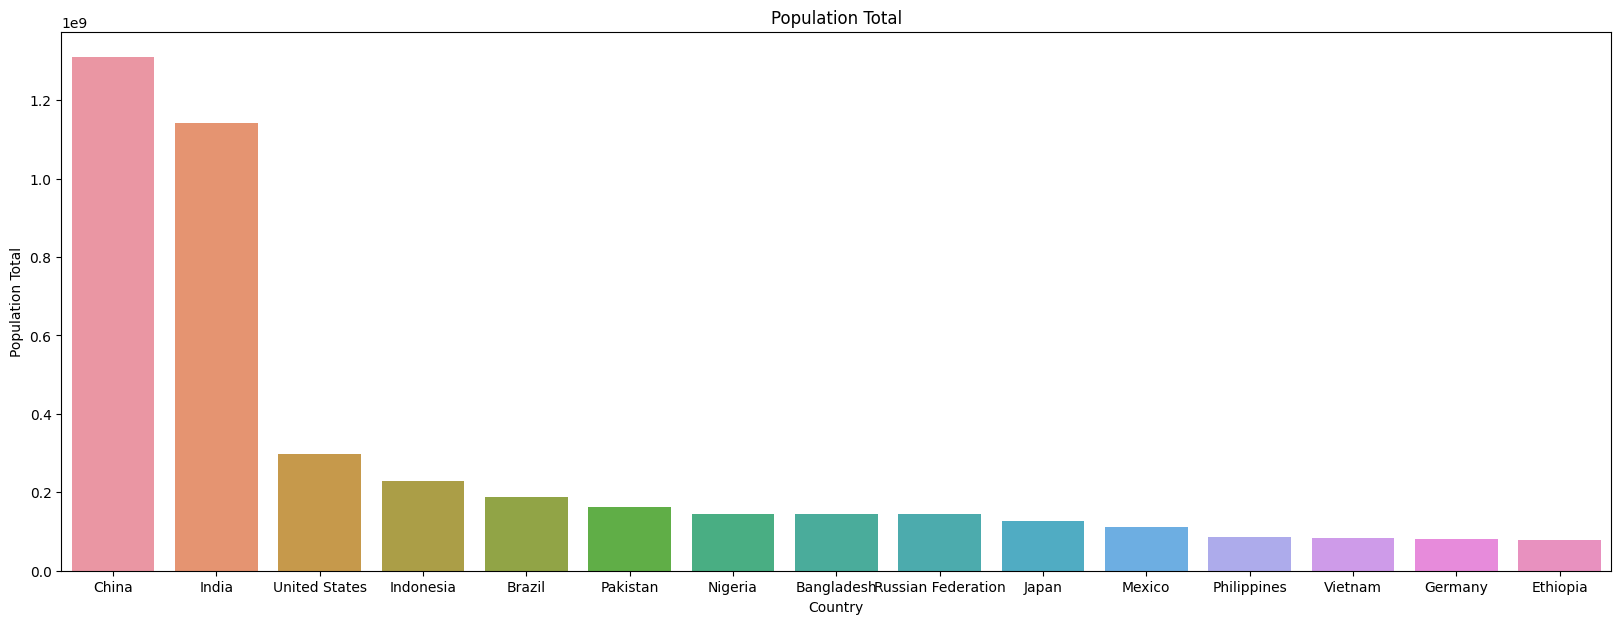

The position of China in world GDP is: 3
The position of India in world GDP is: 11
The position of United States in world GDP is: 1
The position of Indonesia in world GDP is: 19
The position of Brazil in world GDP is: 8
The position of Pakistan in world GDP is: 47
The position of Nigeria in world GDP is: 39
The position of Bangladesh in world GDP is: 60
The position of Russian Federation in world GDP is: 12
The position of Japan in world GDP is: 2


In [37]:
# Checking top 15 countries with Population Total and there position as per GDP
fig, ax = plt.subplots(figsize=(20,7))
plt.title('Population Total')
sns.barplot(x='Country', y='Population Total', data=df1.sort_values('Population Total', ascending=False).head(15))
plt.show()

df1['Percentage of World GDP'] = df1['GDP'] / df1['GDP'].sum() * 100
df1.sort_values('Percentage of World GDP',ascending=False,inplace=True)
df1['Rank_GDP'] = range(1, len(df1) + 1)

top_pop = df1.sort_values('Population Total', ascending=False).head(10)

for country in top_pop['Country']:
  position = df1.loc[df1['Country'] == country]['Rank_GDP']
  print(f"The position of {country} in world GDP is: {position.values[0]}")

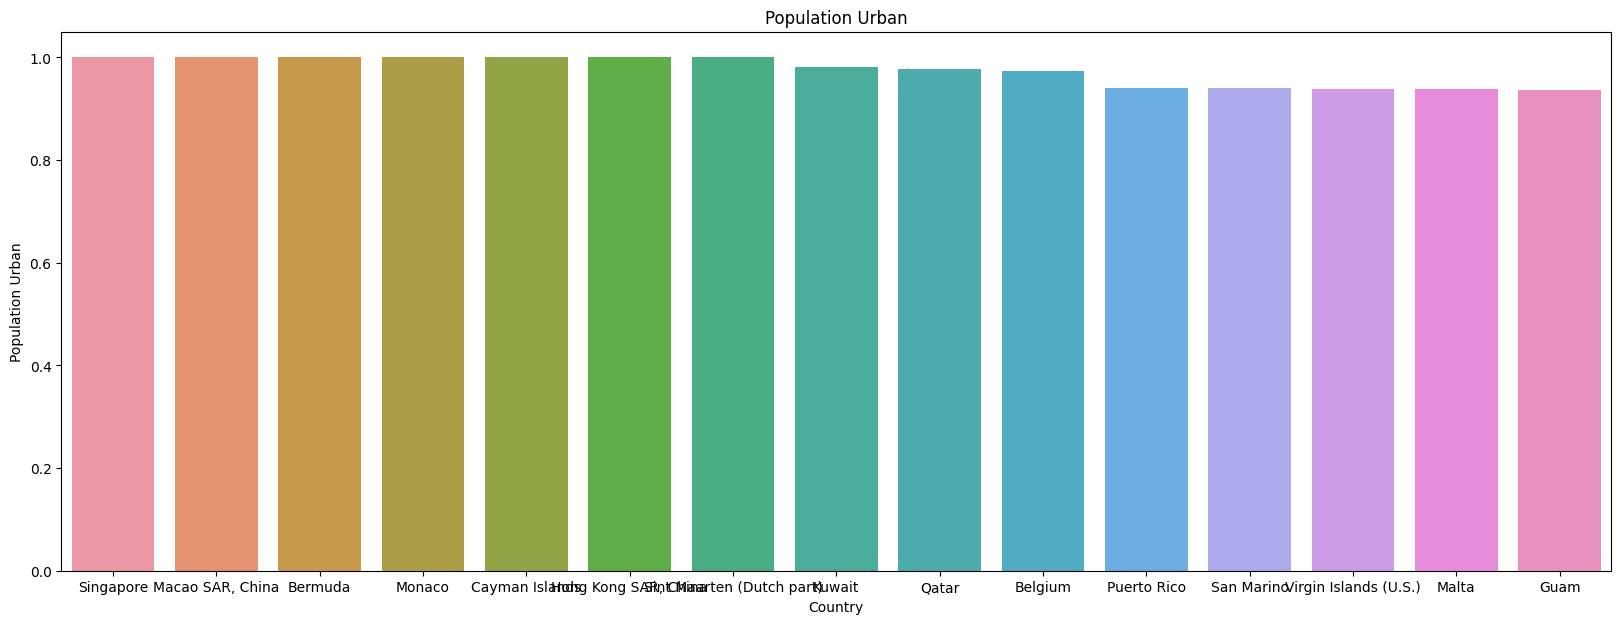

The position of Singapore in world GDP is: 42
The position of Macao SAR, China in world GDP is: 97
The position of Bermuda in world GDP is: 139
The position of Monaco in world GDP is: 141
The position of Cayman Islands in world GDP is: 199
The position of Hong Kong SAR, China in world GDP is: 35
The position of Sint Maarten (Dutch part) in world GDP is: 204
The position of Kuwait in world GDP is: 55
The position of Qatar in world GDP is: 59
The position of Belgium in world GDP is: 20


In [38]:
# Checking top 15 countries with Urban Population and there position as per GDP
fig, ax = plt.subplots(figsize=(20,7))
plt.title('Population Urban')
sns.barplot(x='Country', y='Population Urban', data=df1.sort_values('Population Urban', ascending=False).head(15))
plt.show()

df1['Percentage of World GDP'] = df1['GDP'] / df1['GDP'].sum() * 100
df1.sort_values('Percentage of World GDP',ascending=False,inplace=True)
df1['Rank_GDP'] = range(1, len(df1) + 1)

top_pop = df1.sort_values('Population Urban', ascending=False).head(10)

for country in top_pop['Country']:
  position = df1.loc[df1['Country'] == country]['Rank_GDP']
  print(f"The position of {country} in world GDP is: {position.values[0]}")

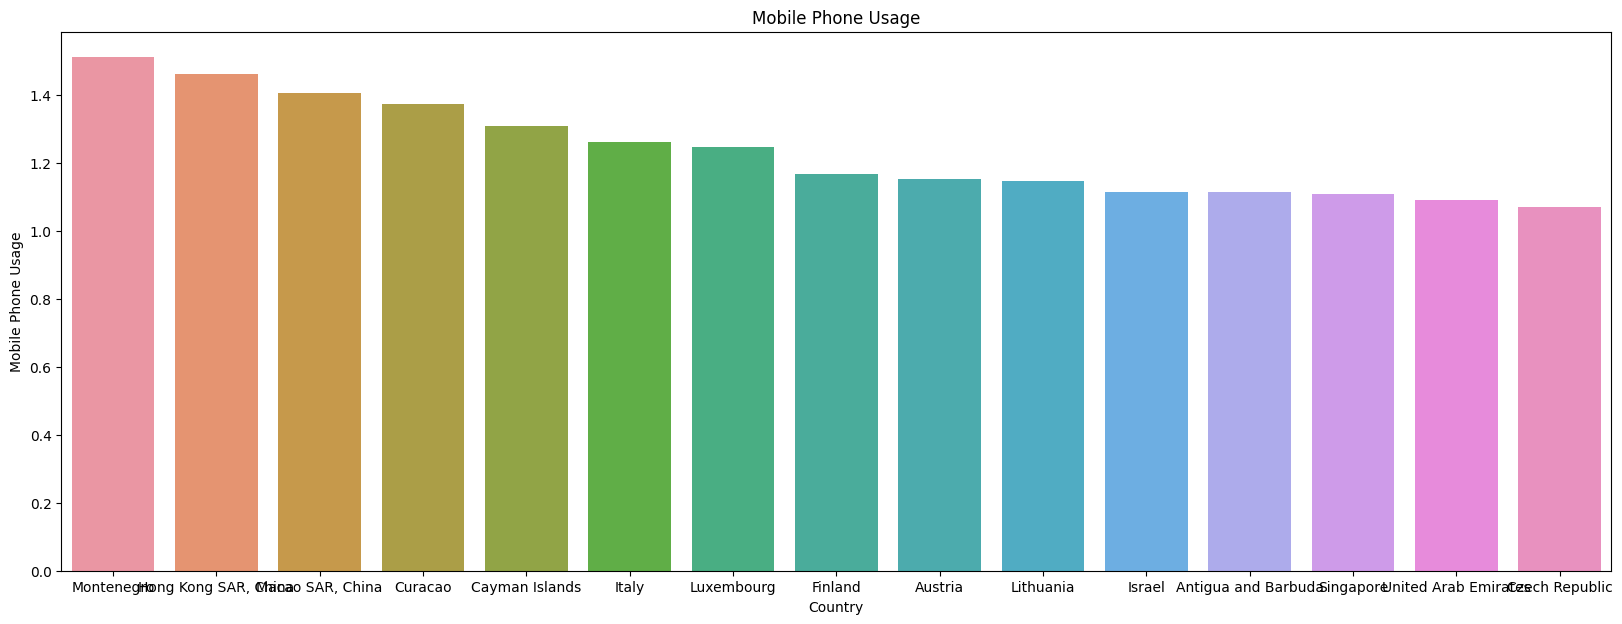

The position of Montenegro in world GDP is: 156
The position of Hong Kong SAR, China in world GDP is: 35
The position of Macao SAR, China in world GDP is: 97
The position of Curacao in world GDP is: 202
The position of Cayman Islands in world GDP is: 199
The position of Italy in world GDP is: 7
The position of Luxembourg in world GDP is: 69
The position of Finland in world GDP is: 34
The position of Austria in world GDP is: 26
The position of Lithuania in world GDP is: 78


In [39]:
# Checking top 15 countries with Urban Population and there position as per GDP
fig, ax = plt.subplots(figsize=(20,7))
plt.title('Mobile Phone Usage')
sns.barplot(x='Country', y='Mobile Phone Usage', data=df1.sort_values('Mobile Phone Usage', ascending=False).head(15))
plt.show()

df1['Percentage of World GDP'] = df1['GDP'] / df1['GDP'].sum() * 100
df1.sort_values('Percentage of World GDP',ascending=False,inplace=True)
df1['Rank_GDP'] = range(1, len(df1) + 1)

top_pop = df1.sort_values('Mobile Phone Usage', ascending=False).head(10)

for country in top_pop['Country']:
  position = df1.loc[df1['Country'] == country]['Rank_GDP']
  print(f"The position of {country} in world GDP is: {position.values[0]}")

Model Building

In [40]:
sort_df = df.copy()

In [41]:
sort_df.drop(['Country'],axis=1)

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,NaN,NaN,26998.0,5.479006e+10,0.035,60.0,NaN,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,1.020000e+08,1.930000e+08
1,0.050,NaN,9542.0,NaN,NaN,7499.0,9.129595e+09,0.034,22.0,NaN,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,3.400000e+07,1.460000e+08
2,0.043,NaN,1617.0,NaN,NaN,1983.0,2.359122e+09,0.043,15.0,NaN,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,7.700000e+07,5.000000e+07
3,0.027,NaN,4276.0,NaN,NaN,1836.0,5.788312e+09,0.047,152.0,NaN,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,2.270000e+08,2.090000e+08
4,0.046,NaN,1041.0,NaN,NaN,NaN,2.610959e+09,0.051,12.0,NaN,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,32427,0.911,NaN,NaN
2700,0.013,46.4,NaN,5.0,4.0,2132446.0,1.624460e+13,0.179,8895.0,175.0,...,76.0,1.0,1,0.196,0.667,0.136,313873685,0.811,2.000920e+11,1.265730e+11
2701,0.015,41.9,NaN,7.0,85.0,NaN,5.000435e+10,0.089,1308.0,310.0,...,74.0,1.5,1,0.220,0.639,0.140,3395253,0.948,2.222000e+09,1.028000e+09
2702,0.020,61.9,NaN,144.0,180.0,NaN,3.812862e+11,0.046,593.0,792.0,...,72.0,1.0,1,0.288,0.652,0.060,29954782,0.889,9.040000e+08,3.202000e+09


In [42]:
df_merged

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.043154,36.3000,2375.727273,8.111111,170.0,0.000000,9.718945e+09,0.091909,30.636364,275.0,...,56.384615,0.254545,1.0,0.490308,0.488769,0.020769,2.539926e+07,0.232923,1.060000e+08,8.240000e+07
Albania,0.014692,42.5500,3902.090909,23.000000,82.0,2024.583333,8.895522e+09,0.061462,168.846154,364.5,...,73.000000,0.561538,1.0,0.258385,0.653692,0.087923,2.956845e+06,0.478538,1.165231e+09,1.007077e+09
Algeria,0.022077,73.7125,102837.636364,25.000000,151.0,34042.166667,1.190391e+11,0.038462,133.846154,451.0,...,68.384615,0.492308,1.0,0.292692,0.663077,0.044231,3.476067e+07,0.645154,2.752308e+08,4.513077e+08
American Samoa,0.020500,0.0000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,...,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,5.752538e+04,0.880000,0.000000e+00,0.000000e+00
Andorra,0.010583,0.0000,537.636364,0.000000,0.0,0.000000,2.268380e+09,0.063231,2394.461538,0.0,...,0.000000,0.700000,1.0,0.000000,0.000000,0.000000,7.668408e+04,0.897462,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0.016769,38.3375,98764.272727,43.200000,98.0,43263.750000,7.791354e+10,0.060769,51.692308,1000.5,...,70.076923,0.546154,1.0,0.266154,0.668538,0.065385,8.325515e+07,0.279462,3.597000e+09,1.325750e+09
Virgin Islands (U.S.),0.013000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,...,75.538462,0.483333,1.0,0.224769,0.661000,0.114308,1.073368e+05,0.938308,1.259091e+09,0.000000e+00
"Yemen, Rep.",0.034923,62.4750,19319.090909,41.300000,129.0,6517.833333,2.065261e+10,0.048308,49.000000,248.0,...,60.384615,0.215385,1.0,0.448077,0.524769,0.027231,2.066415e+07,0.295154,4.613077e+08,2.036667e+08


In [43]:
# Finding the IQR
percentile25 = df1.quantile(0.25)
percentile75 = df1.quantile(0.75)

In [44]:
# Checking Values for 75 Percentile
percentile75

Birth Rate                 2.903846e-02
Business Tax Rate          4.925625e+01
CO2 Emissions              5.379448e+04
Days to Start Business     4.115000e+01
Ease of Business           1.362500e+02
Energy Usage               2.553769e+04
GDP                        1.036772e+11
Health Exp % GDP           7.625000e-02
Health Exp/Capita          5.610577e+02
Hours to do Tax            3.359062e+02
Infant Mortality Rate      4.963462e-02
Internet Usage             3.730769e-01
Lending Interest           1.593462e-01
Life Expectancy Female     7.909615e+01
Life Expectancy Male       7.326923e+01
Mobile Phone Usage         8.269231e-01
Number of Records          1.000000e+00
Population 0-14            3.914423e-01
Population 15-64           6.728269e-01
Population 65+             1.086346e-01
Population Total           2.002100e+07
Population Urban           7.627308e-01
Tourism Inbound            3.070154e+09
Tourism Outbound           1.710538e+09
Percentage of World GDP    2.045370e-01


In [45]:
# Checking Values for 25 Percentile
percentile25

Birth Rate                 1.267308e-02
Business Tax Rate          2.724688e+01
CO2 Emissions              8.041136e+02
Days to Start Business     1.387500e+01
Ease of Business           3.075000e+01
Energy Usage               6.612500e+01
GDP                        2.822984e+09
Health Exp % GDP           3.921154e-02
Health Exp/Capita          3.192308e+01
Hours to do Tax            1.280000e+02
Infant Mortality Rate      5.538462e-03
Internet Usage             3.333333e-02
Lending Interest           4.837500e-02
Life Expectancy Female     6.290385e+01
Life Expectancy Male       6.003846e+01
Mobile Phone Usage         2.543706e-01
Number of Records          1.000000e+00
Population 0-14            1.852308e-01
Population 15-64           5.473077e-01
Population 65+             3.125000e-02
Population Total           9.911953e+05
Population Urban           3.555000e-01
Tourism Inbound            9.150000e+07
Tourism Outbound           5.231591e+07
Percentage of World GDP    5.569257e-03


In [46]:
# Calculating the IQR
iqr = percentile75 - percentile25

In [47]:
# Calculating the Upper and lower limit for each columns
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [48]:
# Printing Upper and Lower Limits
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit Birth Rate                 5.358654e-02
Business Tax Rate          8.227031e+01
CO2 Emissions              1.332800e+05
Days to Start Business     8.206250e+01
Ease of Business           2.945000e+02
Energy Usage               6.374503e+04
GDP                        2.549585e+11
Health Exp % GDP           1.318077e-01
Health Exp/Capita          1.354760e+03
Hours to do Tax            6.477656e+02
Infant Mortality Rate      1.157788e-01
Internet Usage             8.826923e-01
Lending Interest           3.258029e-01
Life Expectancy Female     1.033846e+02
Life Expectancy Male       9.311538e+01
Mobile Phone Usage         1.685752e+00
Number of Records          1.000000e+00
Population 0-14            7.007596e-01
Population 15-64           8.611058e-01
Population 65+             2.247115e-01
Population Total           4.856570e+07
Population Urban           1.373577e+00
Tourism Inbound            7.538135e+09
Tourism Outbound           4.197872e+09
Percentage of World GDP    5

In [49]:
# Finding the number of outliers
df1[(df1 < lower_limit) | (df1 > upper_limit)].count()

Country                     0
Birth Rate                  0
Business Tax Rate          13
CO2 Emissions              30
Days to Start Business     18
Ease of Business            0
Energy Usage               27
GDP                        28
Health Exp % GDP            3
Health Exp/Capita          31
Hours to do Tax            13
Infant Mortality Rate       2
Internet Usage              0
Lending Interest            6
Life Expectancy Female      5
Life Expectancy Male        5
Mobile Phone Usage          0
Number of Records           0
Population 0-14             0
Population 15-64           16
Population 65+              0
Population Total           24
Population Urban            0
Tourism Inbound            30
Tourism Outbound           36
Percentage of World GDP    28
Rank_GDP                    0
dtype: int64

In [50]:
# Finding the percentage of Outliers
(df1[(df1 < lower_limit) | (df1 > upper_limit)].count())/len(df)*100

Country                    0.000000
Birth Rate                 0.000000
Business Tax Rate          0.480769
CO2 Emissions              1.109467
Days to Start Business     0.665680
Ease of Business           0.000000
Energy Usage               0.998521
GDP                        1.035503
Health Exp % GDP           0.110947
Health Exp/Capita          1.146450
Hours to do Tax            0.480769
Infant Mortality Rate      0.073964
Internet Usage             0.000000
Lending Interest           0.221893
Life Expectancy Female     0.184911
Life Expectancy Male       0.184911
Mobile Phone Usage         0.000000
Number of Records          0.000000
Population 0-14            0.000000
Population 15-64           0.591716
Population 65+             0.000000
Population Total           0.887574
Population Urban           0.000000
Tourism Inbound            1.109467
Tourism Outbound           1.331361
Percentage of World GDP    1.035503
Rank_GDP                   0.000000
dtype: float64

In [51]:
df_merged.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [52]:
cols = ['Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Population 15-64','Population Total',
       'Tourism Inbound', 'Tourism Outbound']

In [53]:
def Iqr(df_merged, cols):
    for col in cols:
      iqr = percentile75 - percentile25
      Highest_allowed = percentile75 + 1.5 * iqr
      Lowest_allowed = percentile25 + 1.5 * iqr
      df_merged[col] = np.where(df_merged[col] > Highest_allowed[col], Highest_allowed[col], np.where(df_merged[col] < Lowest_allowed[col], Lowest_allowed[col], df_merged[col]))

In [54]:
Iqr(df_merged, cols)

In [55]:
# Finding the number of outliers
df_merged[(df_merged < lower_limit) | (df_merged > upper_limit)].count()

Birth Rate                0
Business Tax Rate         0
CO2 Emissions             0
Days to Start Business    0
Ease of Business          0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Number of Records         0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64

In [56]:
df1.drop(columns=['Country'], inplace = True)

In [57]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [58]:
df_merged.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Number of Records', 'Population 0-14', 'Population 15-64',
       'Population 65+', 'Population Total', 'Population Urban',
       'Tourism Inbound', 'Tourism Outbound'],
      dtype='object')

In [59]:
df_merged.rename(columns={'Birth Rate':'Birth_Rate'},inplace=True)

In [60]:
df_merged.rename(columns={'Business Tax Rate':'Business_Tax_Rate','CO2 Emissions':'CO2_Emissions','Ease of Business':'Ease_of_Business','Energy Usage':'Energy_Usage','Days to Start Business':'Days_to_Start_Business'},inplace=True)

In [61]:
df_merged.rename(columns={'Health Exp/Capita':'Health_Exp/Capita','Hours to do Tax':'Hours_to_do_Tax','Infant Mortality Rate':'Infant_Mortality_Rate','Internet Usage':'Internet_Usage','Lending Interest':'Lending_Interest','Life Expectancy Female':'Life_Expectancy_Female'}, inplace=True)

In [62]:
df_merged.rename(columns={'Life Expectancy Male':'Life_Expectancy_Male','Mobile Phone Usage':'Mobile_Phone_Usage','Number of Records':'Number_of_Records','Population 0-14':'Population_0-14','Population 15-64':'Population_15-64','Population 65+':'Population_65+'}, inplace=True)

In [63]:
df_merged.rename(columns={'Population Total':'Population_Total','Population Urban':'Population_Urban','Tourism Inbound':'Tourism_Inbound','Tourism Outbound':'Tourism_Outbound'}, inplace=True)

In [64]:
df_merged.drop(columns=['Health Exp % GDP','Number_of_Records'], inplace=True)

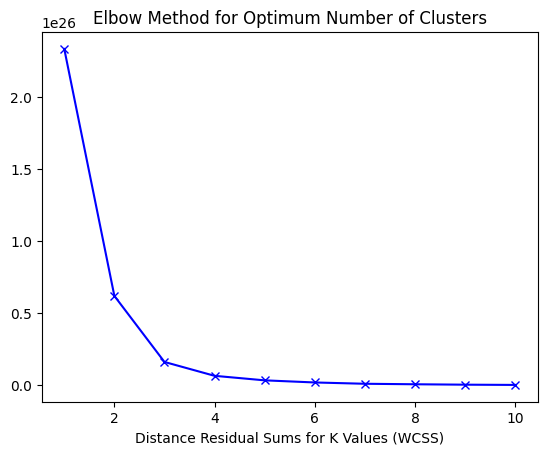

In [65]:
# Checking clusters before outlier treatment.
kmeans = KMeans()
ssd = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df1)
    ssd.append(kmeans.inertia_)

ssd

plt.plot(K, ssd, "bx-")
plt.xlabel("Distance Residual Sums for K Values (WCSS)")
plt.title("Elbow Method for Optimum Number of Clusters")
plt.show()

In [66]:
kmeans = KMeans(n_clusters=4)
kmeans

KMeans(n_clusters=4)

In [67]:
y_pred = kmeans.fit_predict(df1)

In [68]:
y_pred

array([1, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

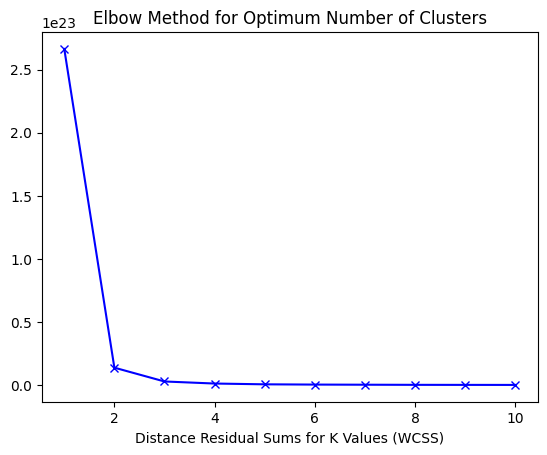

In [69]:
# Checking clusters after outlier treatment.
kmeans = KMeans()
ssd = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df_merged)
    ssd.append(kmeans.inertia_)

ssd

plt.plot(K, ssd, "bx-")
plt.xlabel("Distance Residual Sums for K Values (WCSS)")
plt.title("Elbow Method for Optimum Number of Clusters")
plt.show()

In [70]:
model_kmeans = KMeans(n_clusters=3)
model_kmeans

KMeans(n_clusters=3)

In [71]:
y_pred_kmeans = model_kmeans.fit_predict(df_merged)

In [72]:
y_pred_kmeans

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0,
       2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1,
       1, 0, 0, 0, 2, 0, 0, 0, 0, 0])

### K-Means Model Evaluation

In [73]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(df_merged, y_pred_kmeans))

Silhouette Coefficient: 0.956


In [74]:
print("Calinski Harabasz Score : %0.3f"%metrics.calinski_harabasz_score(df_merged, y_pred_kmeans))

Calinski Harabasz Score : 9532.076


- Calinski Harabasz is also known as the Variance Ratio Criterion.
- The score is defined as ratio of the sum of between-cluster dispersion and of within-cluster dispersion.
- More the score, better the result.

In [75]:
from sklearn.metrics import davies_bouldin_score
print("Davies-Bouldin Index : %0.3f"%davies_bouldin_score(df_merged, y_pred_kmeans))

Davies-Bouldin Index : 0.261


- If the ground truth labels are not known, the Davies-Bouldin index can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

- The Davies-Bouldin score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

- The minimum score is zero, with lower values indicating better clustering.

In [76]:
df2 = df_merged.copy()

## DBSCAN 

In [77]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [78]:
db = DBSCAN(eps=0.3, min_samples=10).fit(df1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [79]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [80]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 0
Estimated number of noise points: 208


In [81]:
# Checking for clustering after Outliers treatment
db = DBSCAN(eps=0.4, min_samples=5).fit(df2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels1 = db.labels_

In [82]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_1 = len(set(labels1)) - (1 if -1 in labels1 else 0)
n_noise_1 = list(labels1).count(-1)

In [83]:
print('Estimated number of clusters: %d' % n_clusters_1)
print('Estimated number of noise points: %d' % n_noise_1)

Estimated number of clusters: 1
Estimated number of noise points: 69


### Model Evaluation

In [84]:
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(df2, labels1))

Silhouette Coefficient: 0.601


In [85]:
print("Calinski Harabasz Score : %0.3f"%metrics.calinski_harabasz_score(df2, labels1))

Calinski Harabasz Score : 163.327


In [86]:
print("Davies-Bouldin Index : %0.3f"%davies_bouldin_score(df2, labels1))

Davies-Bouldin Index : 0.880


## Hierarchical Clustering

In [87]:
df3 = df_merged.copy()

In [88]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

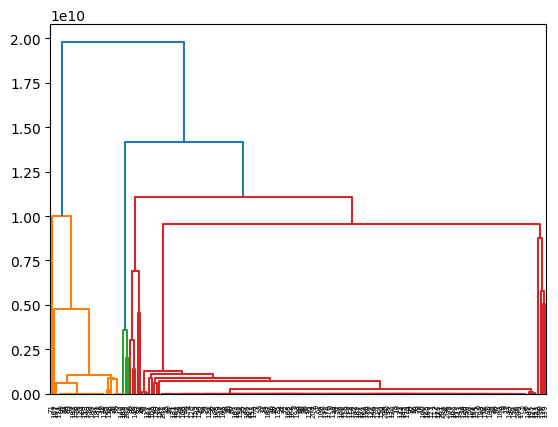

In [89]:
dendogram= sch.dendrogram(sch.linkage(df_merged,method='single'))

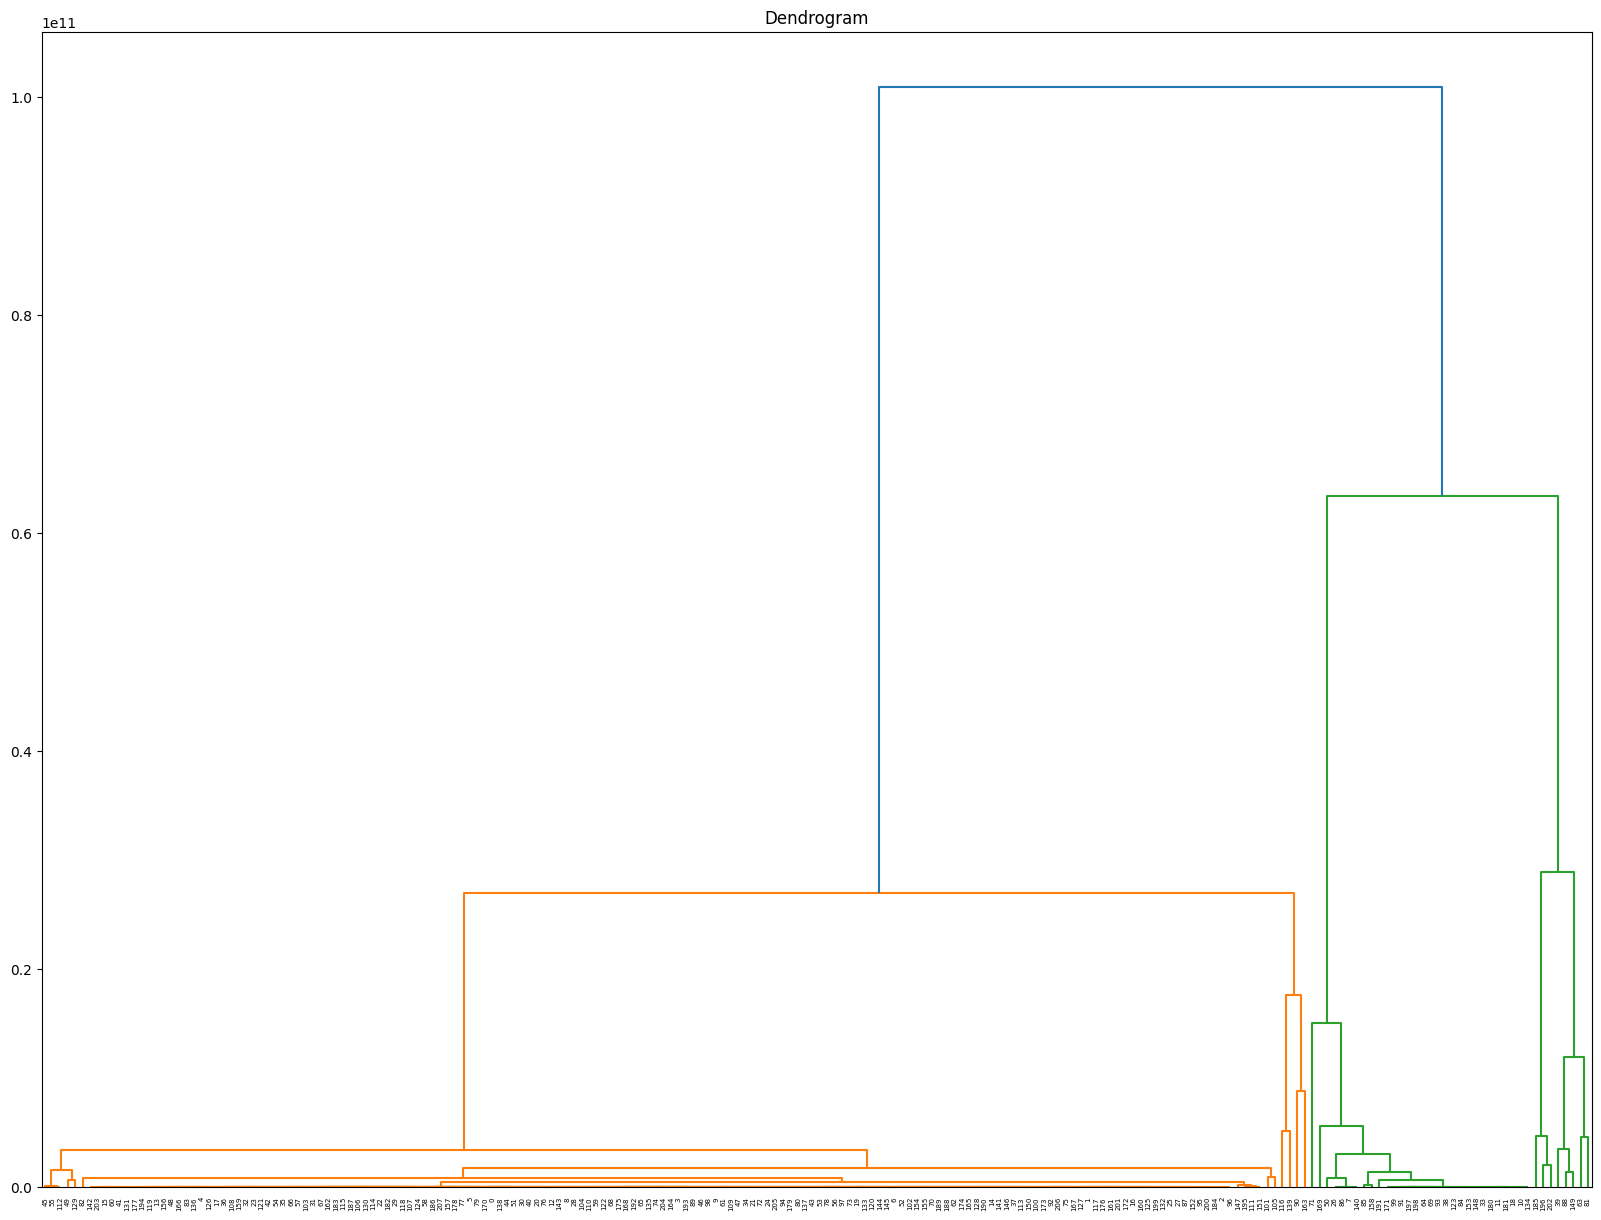

In [90]:
plt.figure(figsize =(20,15))
plt.title('Dendrogram')

linkage_method = sch.linkage(df_merged, method ='complete', metric='euclidean')
Dendrogram = sch.dendrogram(linkage_method)

#### Creating clusters

In [91]:
# no of clusteres = 2
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'complete')
hc

AgglomerativeClustering(linkage='complete')

In [92]:
# save clusters for chart
y_hc = hc.fit_predict(df3)
y_hc

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [93]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,1
...,...
203,1
204,1
205,1
206,1


In [94]:
Clusters.value_counts()

Clusters
1           170
0            38
dtype: int64

### Hierarchical clustering Model evaluation with no of clusteres = 2

In [95]:
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(df_merged, Clusters))
print("Calinski Harabasz Score : %0.3f"%metrics.calinski_harabasz_score(df_merged,  Clusters))
print("Davies-Bouldin Index : %0.3f"%davies_bouldin_score(df_merged, Clusters))

Silhouette Coefficient: 0.936
Calinski Harabasz Score : 2725.219
Davies-Bouldin Index : 0.199


In [96]:
# no of clusteres = 3
hc1 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [97]:
# save clusters for chart
y_hc1 = hc1.fit_predict(df3)
y_hc1

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1,
       0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2,
       2, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [98]:
Clusters1=pd.DataFrame(y_hc1,columns=['Clusters'])

In [99]:
Clusters1.value_counts()

Clusters
1           170
2            30
0             8
dtype: int64

### Hierarchical clustering evaluation with no of clusteres = 3

In [100]:
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(df3, Clusters1))

Silhouette Coefficient: 0.955


In [101]:
print("Calinski Harabasz Score : %0.3f"%metrics.calinski_harabasz_score(df3,  Clusters1))

Calinski Harabasz Score : 8906.910


In [102]:
print("Davies-Bouldin Index : %0.3f"%davies_bouldin_score(df3, Clusters1))

Davies-Bouldin Index : 0.247


- We can see that, K-Means clustering gives us the best result, so choosing K-Means clustering for deployment purpose.
​

In [103]:
df_merged

,Birth_Rate,Business_Tax_Rate,CO2_Emissions,Days_to_Start_Business,Ease_of_Business,Energy_Usage,GDP,Health_Exp/Capita,Hours_to_do_Tax,Infant_Mortality_Rate,...,Life_Expectancy_Female,Life_Expectancy_Male,Mobile_Phone_Usage,Population_0-14,Population_15-64,Population_65+,Population_Total,Population_Urban,Tourism_Inbound,Tourism_Outbound
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.043154,60.260937,80289.659091,54.7875,170.0,38273.46875,1.541043e+11,825.625000,439.859375,0.082769,...,87.192308,79.884615,0.254545,0.490308,0.735587,0.020769,2.953590e+07,0.232923,4.559481e+09,2.539650e+09
Albania,0.014692,60.260937,80289.659091,54.7875,82.0,38273.46875,1.541043e+11,825.625000,439.859375,0.071683,...,87.192308,79.884615,0.561538,0.258385,0.735587,0.087923,2.953590e+07,0.478538,4.559481e+09,2.539650e+09
Algeria,0.022077,73.712500,102837.636364,54.7875,151.0,38273.46875,1.541043e+11,825.625000,451.000000,0.071683,...,87.192308,79.884615,0.492308,0.292692,0.735587,0.044231,3.476067e+07,0.645154,4.559481e+09,2.539650e+09
American Samoa,0.020500,60.260937,80289.659091,54.7875,0.0,38273.46875,1.541043e+11,825.625000,439.859375,0.071683,...,87.192308,79.884615,0.000000,0.000000,0.735587,0.000000,2.953590e+07,0.880000,4.559481e+09,2.539650e+09
Andorra,0.010583,60.260937,80289.659091,54.7875,0.0,38273.46875,1.541043e+11,1354.759615,439.859375,0.071683,...,87.192308,79.884615,0.700000,0.000000,0.735587,0.000000,2.953590e+07,0.897462,4.559481e+09,2.539650e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0.016769,60.260937,98764.272727,54.7875,98.0,43263.75000,1.541043e+11,825.625000,647.765625,0.071683,...,87.192308,79.884615,0.546154,0.266154,0.735587,0.065385,4.856570e+07,0.279462,4.559481e+09,2.539650e+09
Virgin Islands (U.S.),0.013000,60.260937,80289.659091,54.7875,0.0,38273.46875,1.541043e+11,825.625000,439.859375,0.071683,...,87.192308,79.884615,0.483333,0.224769,0.735587,0.114308,2.953590e+07,0.938308,4.559481e+09,2.539650e+09
"Yemen, Rep.",0.034923,62.475000,80289.659091,54.7875,129.0,38273.46875,1.541043e+11,825.625000,439.859375,0.071683,...,87.192308,79.884615,0.215385,0.448077,0.735587,0.027231,2.953590e+07,0.295154,4.559481e+09,2.539650e+09


In [105]:
import pickle

In [106]:
with open('model_kmeans', 'wb') as f:
    pickle.dump(model_kmeans, f)